In [1]:
import os
import sys

sys.path.append(os.path.join(".."))

import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from src.model_utils import custom_multiclass_report
from src.evaluation import load_data_from_files, evaluate_models_on_test_data
from sklearn.metrics import classification_report, confusion_matrix


##  Data

In [2]:
data = load_data_from_files()
X_lstm, X, y, keys = data["X_lstm"], data["X"], data["y"], data["keys"]

X_test = X["Test"]
X_test_t = torch.tensor(X["Test"], dtype=torch.float)
X_lstm = torch.tensor(X_lstm["Test"], dtype=torch.float)
y_test = np.argmax(y["Test"], 1)

del data, X, y

## Testing models on the same test data

In [3]:
# Path to pickled models
path_to_pickled_models = os.path.join("..", "results", "pickle_models")

clf_dict = {
    "lr": os.path.join(path_to_pickled_models, "Logistic_Regression.pkl"),
    "lgbm": os.path.join(path_to_pickled_models, "LightGBM.pkl"),
    "xgboost": os.path.join(path_to_pickled_models, "XGBoost.pkl"),
    "catboost": os.path.join(path_to_pickled_models, "catboost.pkl"),
}

clf_nn_dict = {
    "mlp": os.path.join(path_to_pickled_models, "MLP.ckpt"),
    "lstm": os.path.join(path_to_pickled_models, "LSTM.ckpt"),
    "transformer": os.path.join(path_to_pickled_models, "transformer.ckpt"),
    "conv_lstm": os.path.join(path_to_pickled_models, "conv_lstm.ckpt")
}

### Calculate metrics for all models in a sequence

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
  0%|          | 0/8 [00:00<?, ?it/s]

lr results:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84   2493115
           1       0.58      0.17      0.26     31174
           2       0.13      0.36      0.19    124554
           3       0.31      0.80      0.45    249306

    accuracy                           0.73   2898149
   macro avg       0.50      0.52      0.44   2898149
weighted avg       0.87      0.73      0.77   2898149



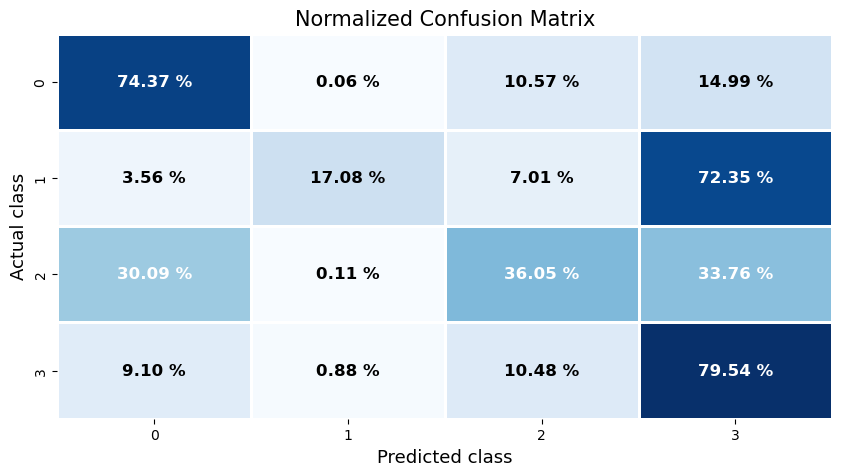

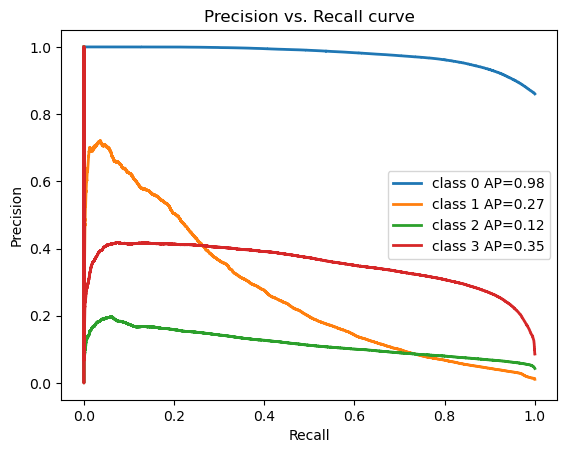

Average AP over all classes: 0.4280


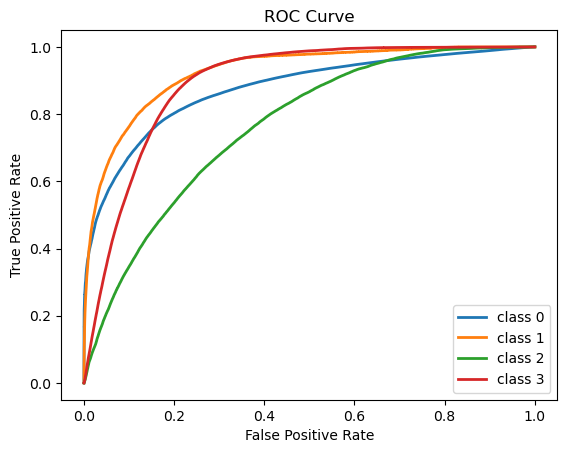

0 ROC AUC OVR: 0.8755
1 ROC AUC OVR: 0.9256
2 ROC AUC OVR: 0.7644
3 ROC AUC OVR: 0.8917
Average ROC AUC OVR: 0.8643


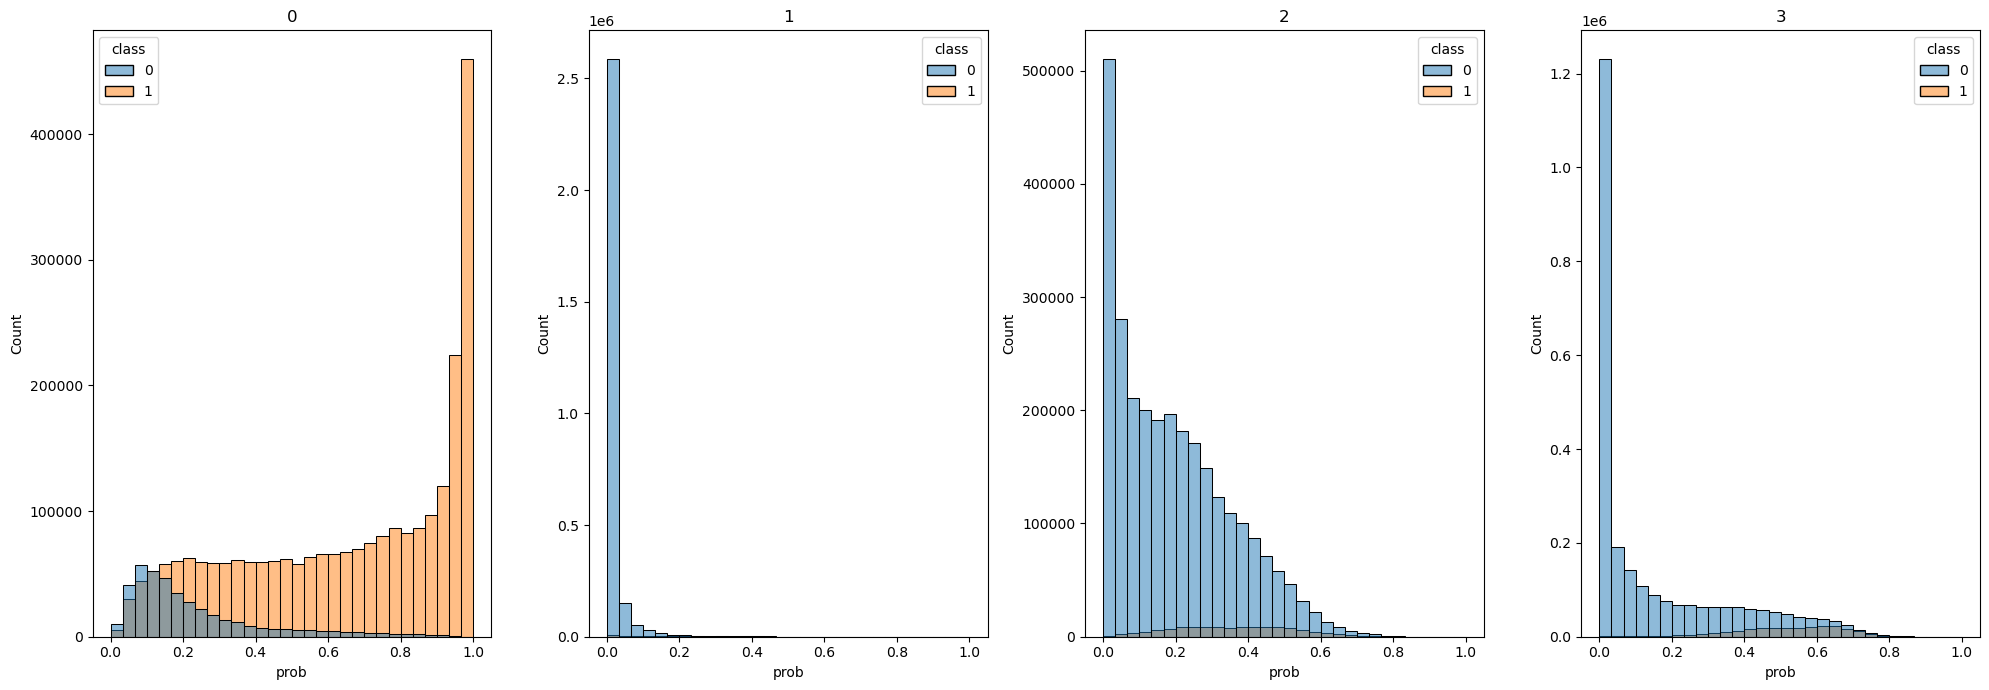

0 vs 1 ROC AUC OVO: 0.9417
0 vs 2 ROC AUC OVO: 0.8082
0 vs 3 ROC AUC OVO: 0.9008
1 vs 2 ROC AUC OVO: 0.8650
1 vs 3 ROC AUC OVO: 0.7965
2 vs 3 ROC AUC OVO: 0.6866
Average ROC AUC OVO: 0.8331


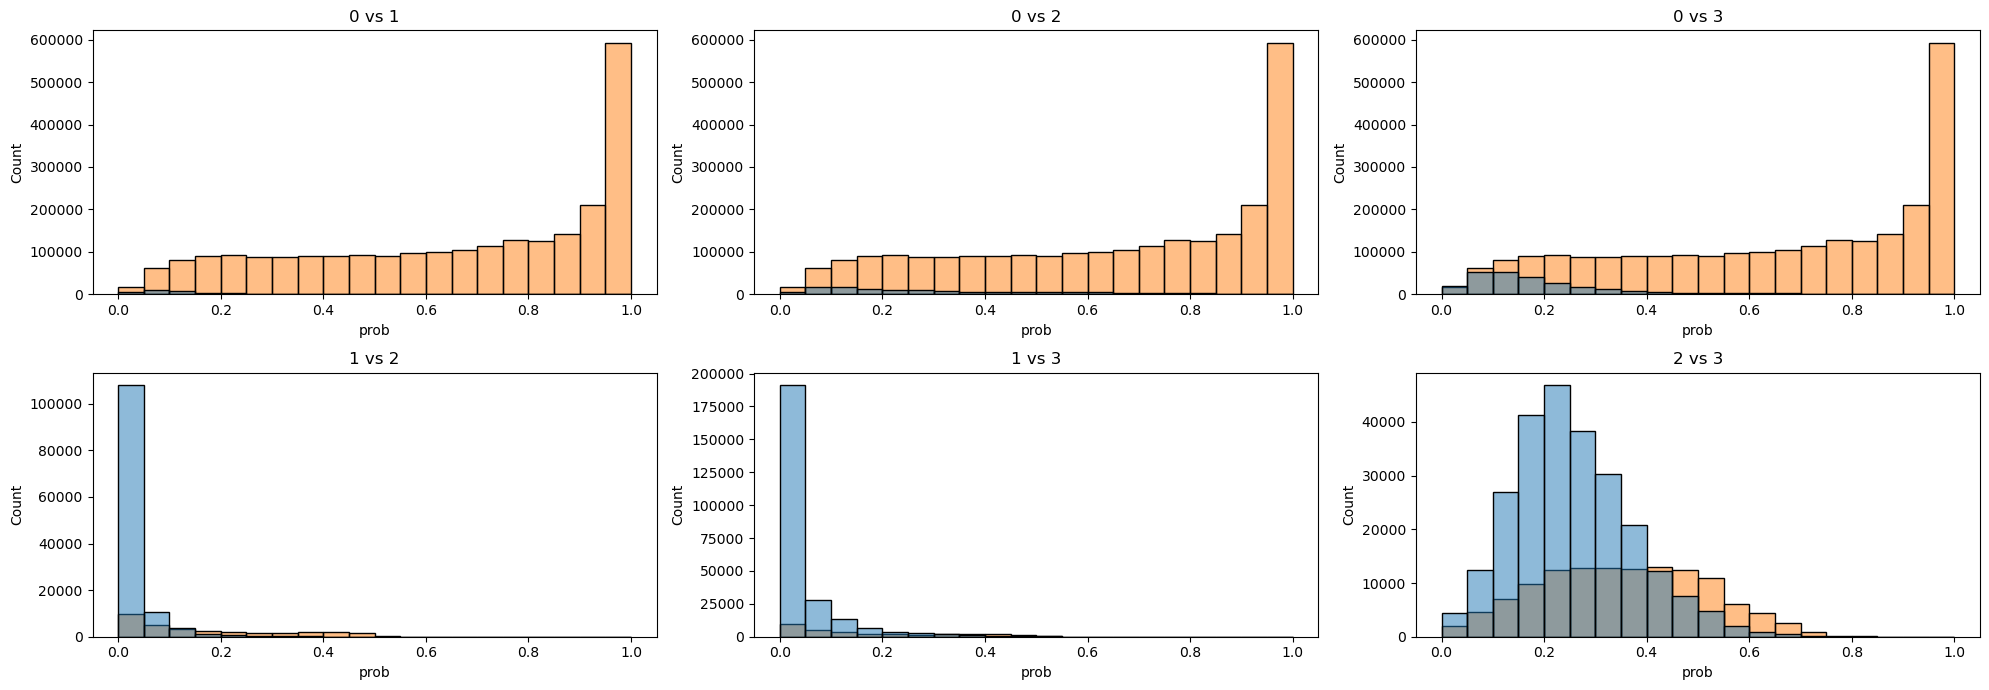

 12%|█▎        | 1/8 [01:31<10:43, 91.93s/it]

lgbm results:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90   2493115
           1       0.69      0.36      0.48     31174
           2       0.32      0.60      0.42    124554
           3       0.39      0.89      0.55    249306

    accuracy                           0.82   2898149
   macro avg       0.60      0.67      0.58   2898149
weighted avg       0.91      0.82      0.85   2898149



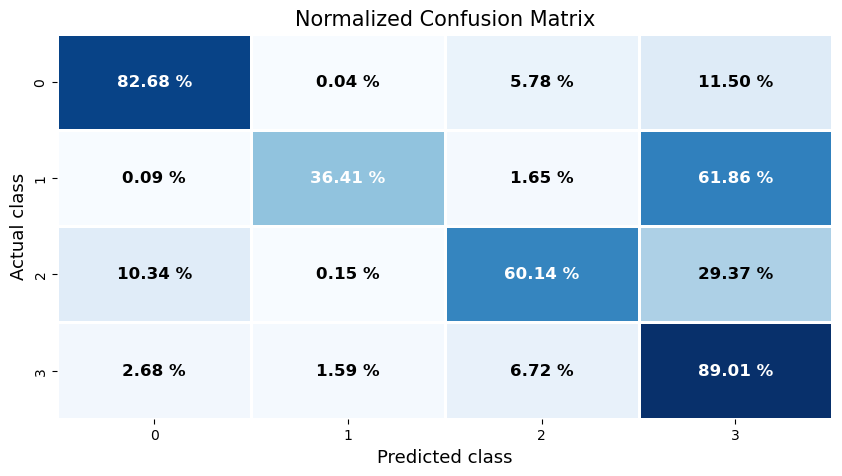

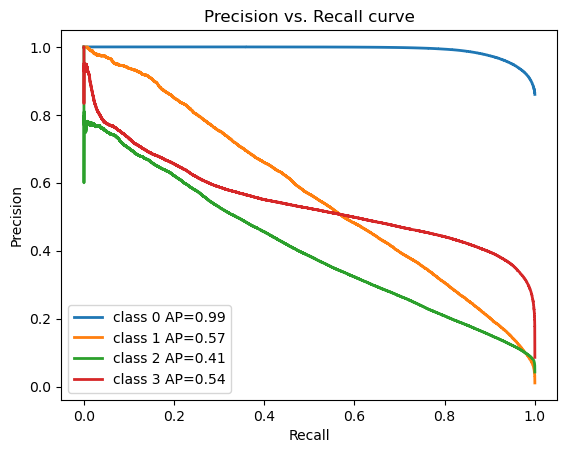

Average AP over all classes: 0.6283


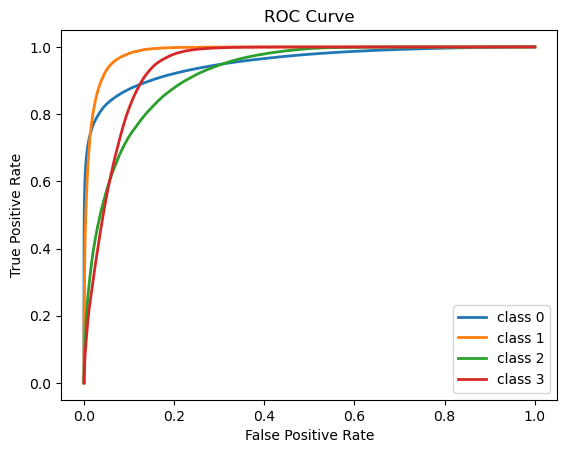

0 ROC AUC OVR: 0.9535
1 ROC AUC OVR: 0.9861
2 ROC AUC OVR: 0.9209
3 ROC AUC OVR: 0.9430
Average ROC AUC OVR: 0.9509


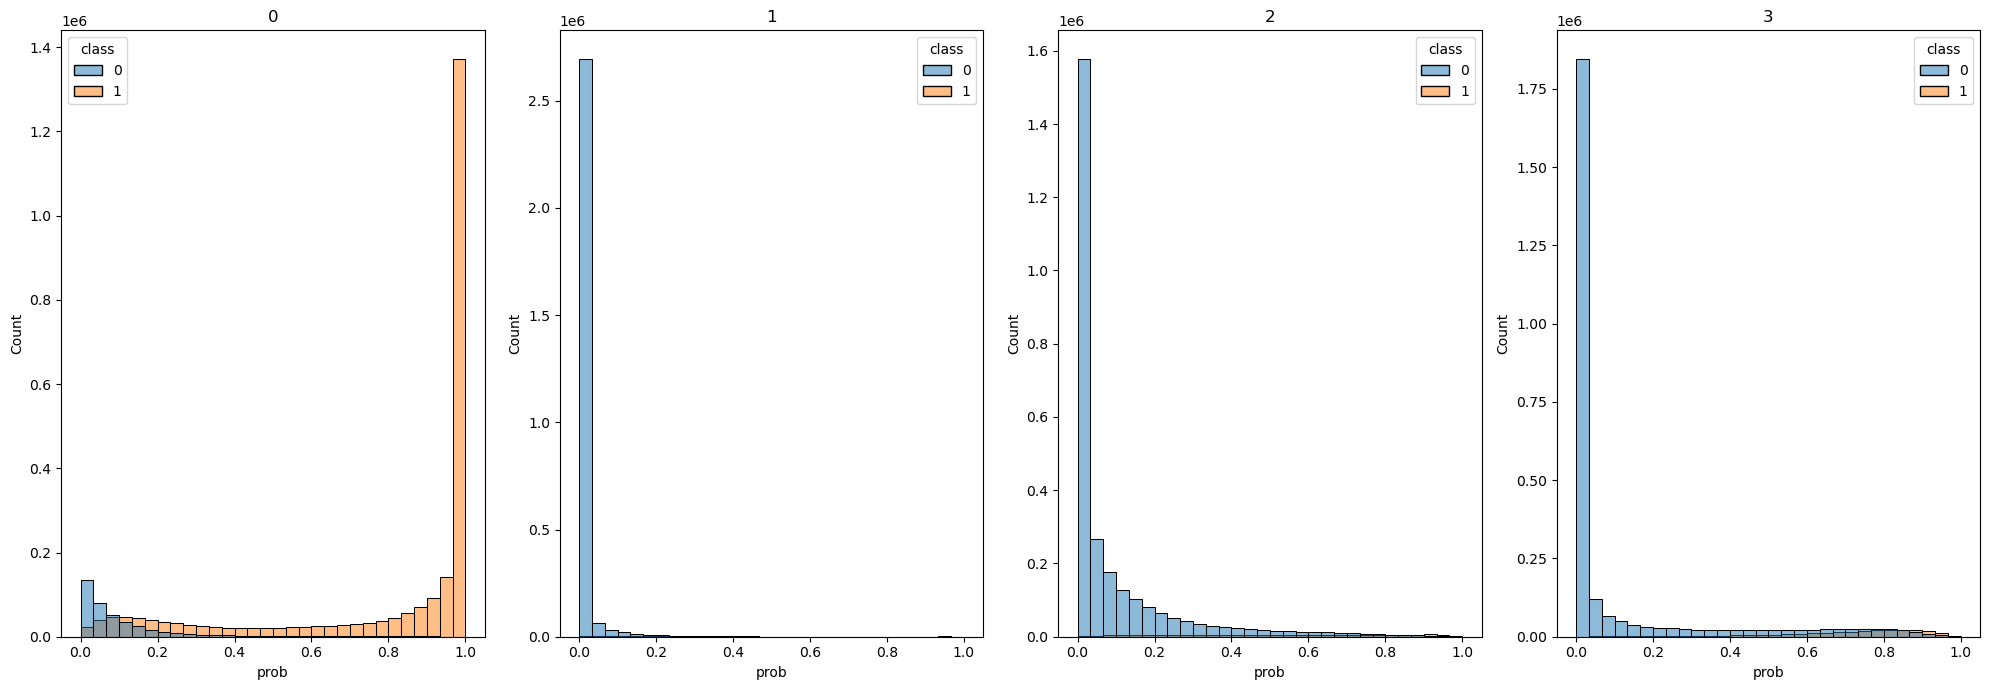

0 vs 1 ROC AUC OVO: 0.9910
0 vs 2 ROC AUC OVO: 0.9290
0 vs 3 ROC AUC OVO: 0.9611
1 vs 2 ROC AUC OVO: 0.9742
1 vs 3 ROC AUC OVO: 0.9086
2 vs 3 ROC AUC OVO: 0.8873
Average ROC AUC OVO: 0.9419


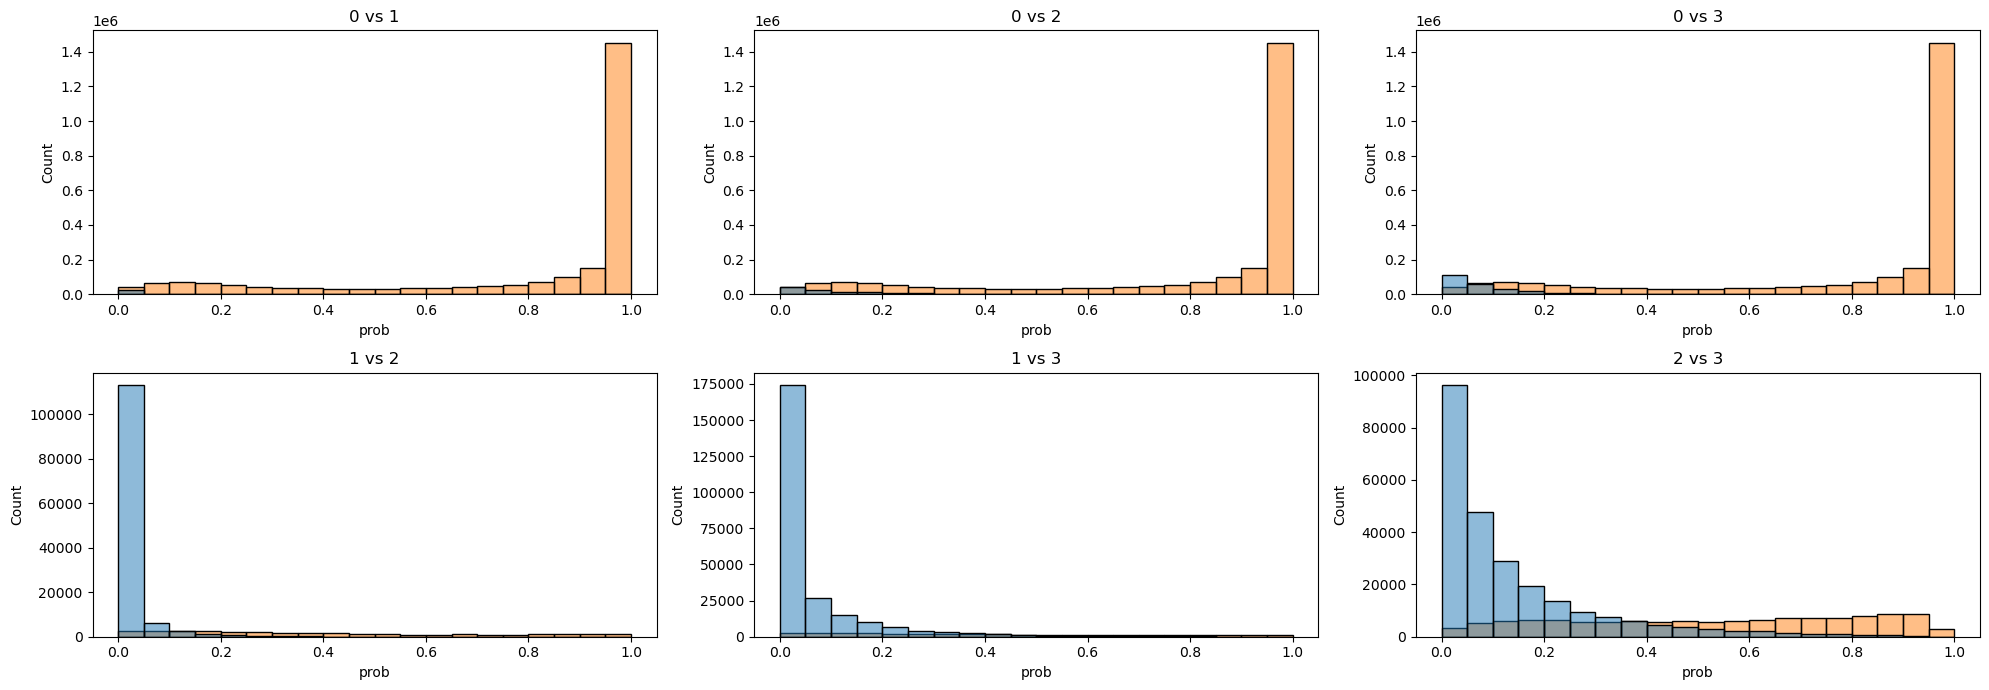

 25%|██▌       | 2/8 [03:16<09:55, 99.22s/it]

xgboost results:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91   2493115
           1       0.70      0.43      0.53     31174
           2       0.37      0.65      0.47    124554
           3       0.42      0.89      0.57    249306

    accuracy                           0.84   2898149
   macro avg       0.62      0.70      0.62   2898149
weighted avg       0.91      0.84      0.86   2898149



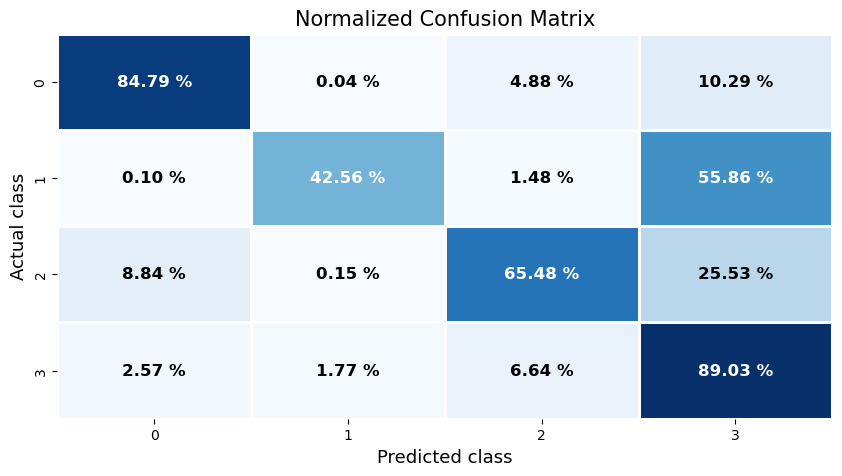

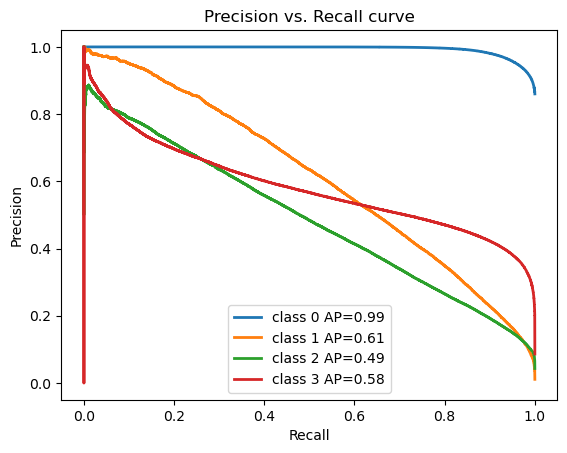

Average AP over all classes: 0.6691


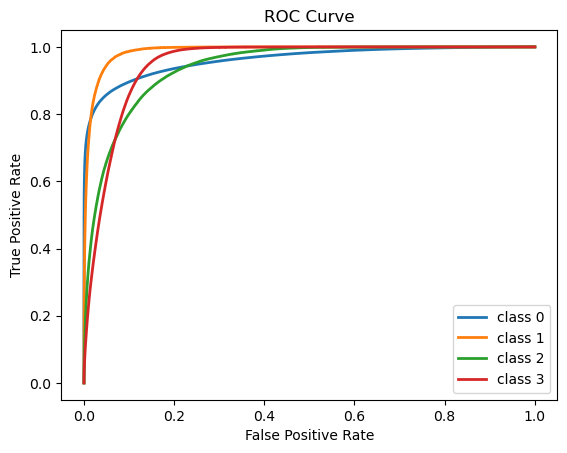

0 ROC AUC OVR: 0.9620
1 ROC AUC OVR: 0.9883
2 ROC AUC OVR: 0.9407
3 ROC AUC OVR: 0.9502
Average ROC AUC OVR: 0.9603


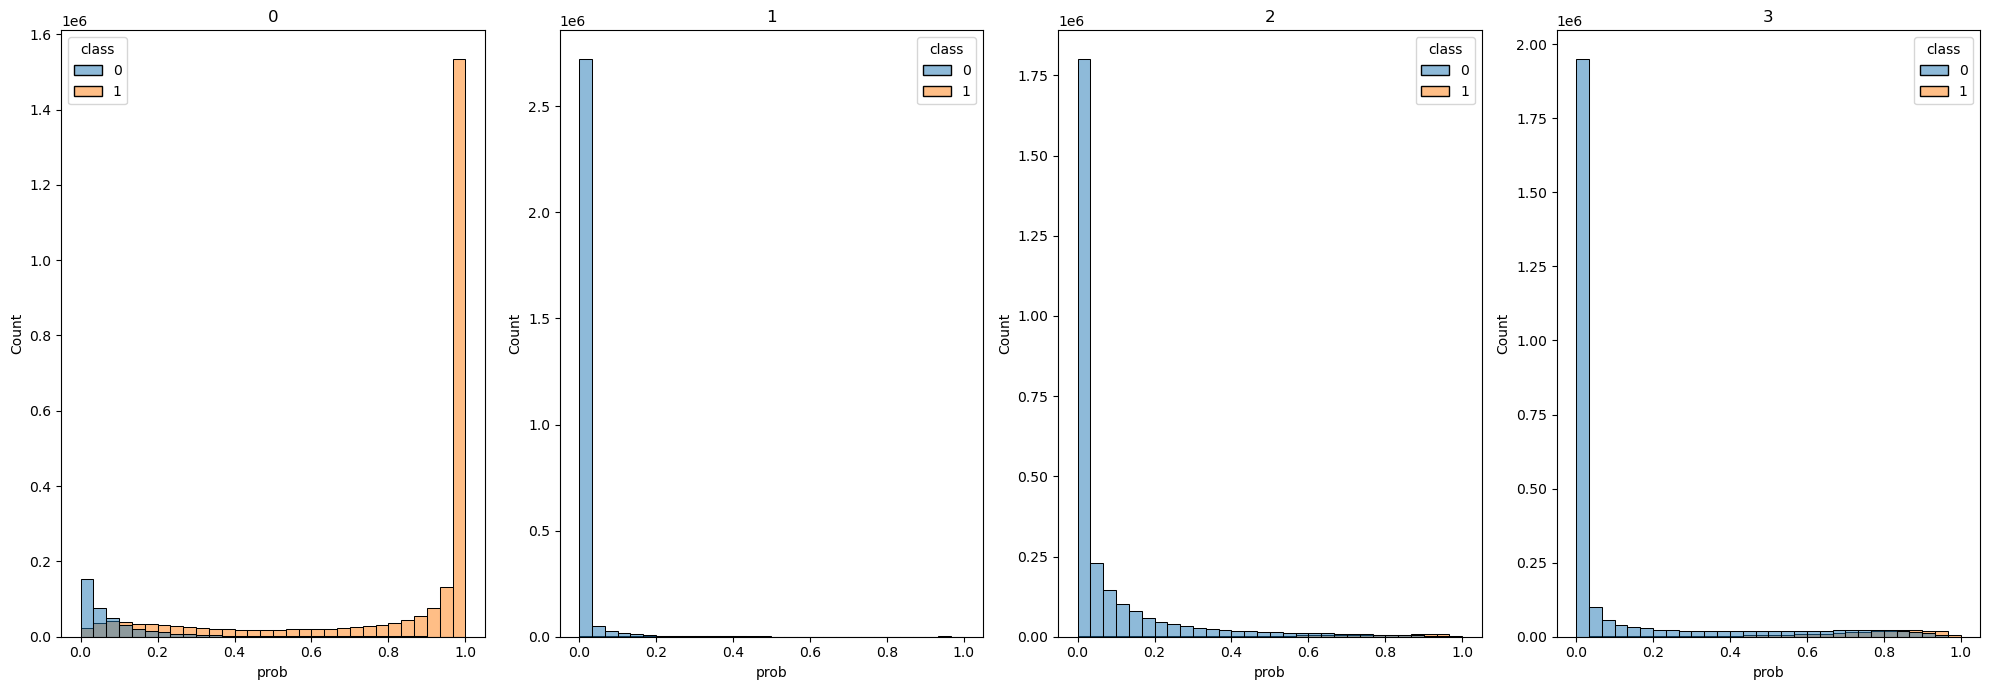

0 vs 1 ROC AUC OVO: 0.9929
0 vs 2 ROC AUC OVO: 0.9444
0 vs 3 ROC AUC OVO: 0.9670
1 vs 2 ROC AUC OVO: 0.9796
1 vs 3 ROC AUC OVO: 0.9192
2 vs 3 ROC AUC OVO: 0.9068
Average ROC AUC OVO: 0.9516


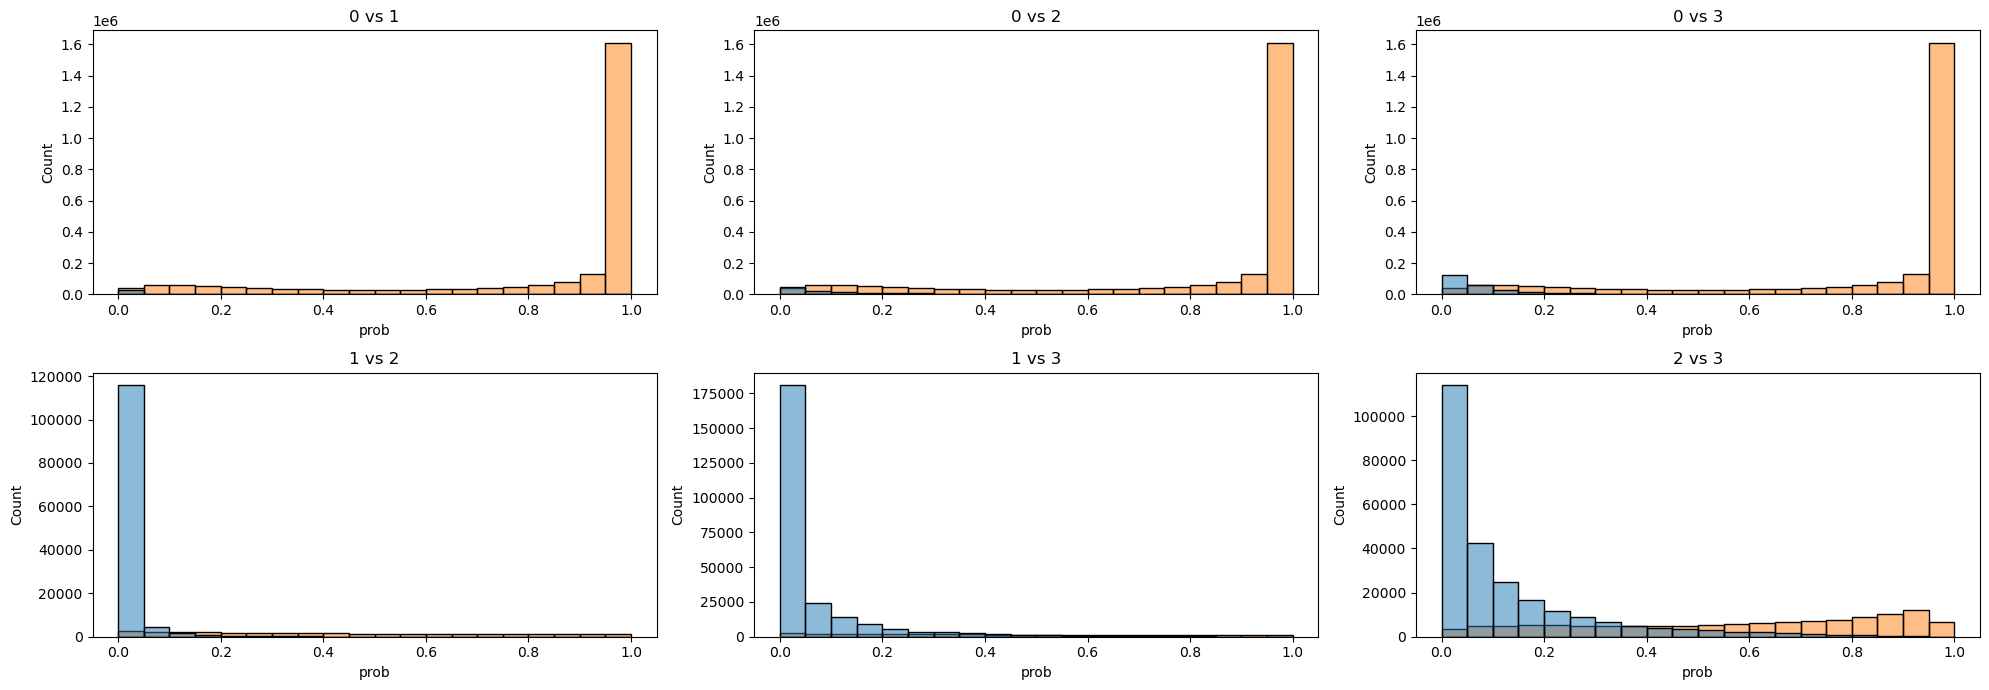

 38%|███▊      | 3/8 [11:22<22:59, 275.99s/it]

catboost results:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92   2493115
           1       0.73      0.50      0.60     31174
           2       0.41      0.70      0.51    124554
           3       0.45      0.90      0.60    249306

    accuracy                           0.85   2898149
   macro avg       0.65      0.74      0.66   2898149
weighted avg       0.92      0.85      0.87   2898149



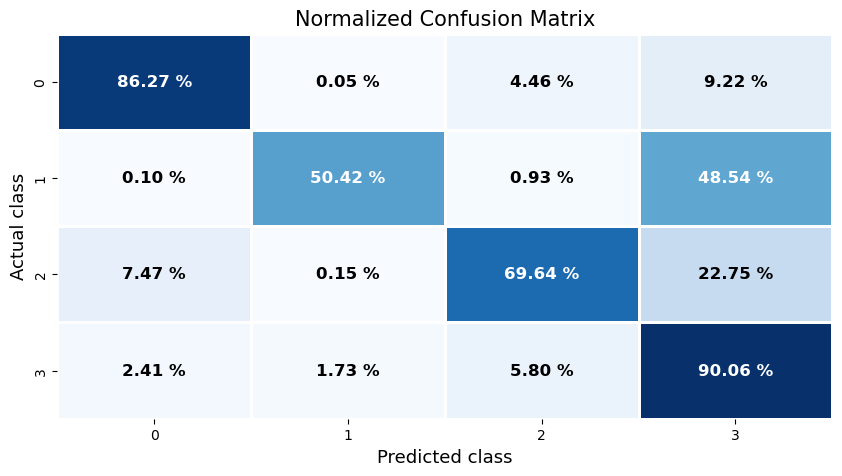

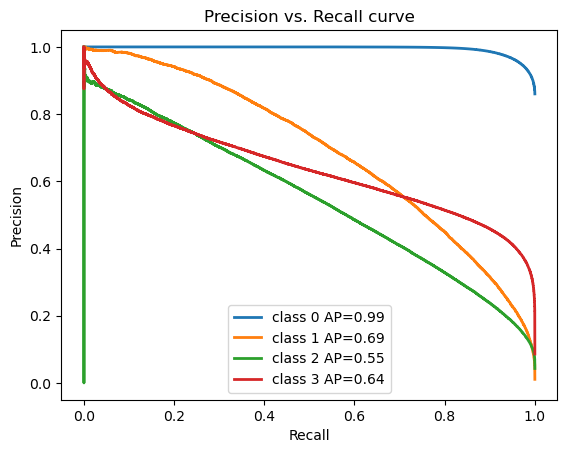

Average AP over all classes: 0.7183


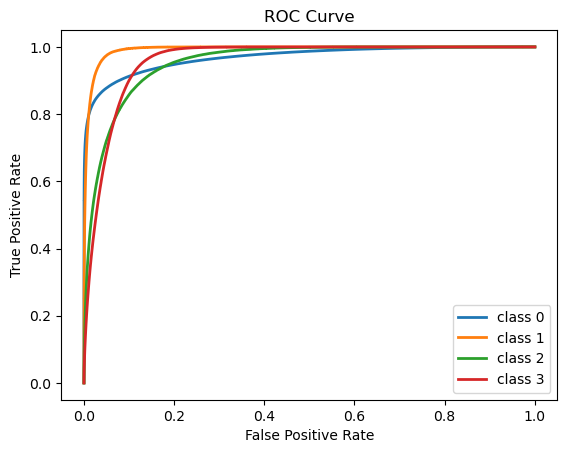

0 ROC AUC OVR: 0.9688
1 ROC AUC OVR: 0.9923
2 ROC AUC OVR: 0.9539
3 ROC AUC OVR: 0.9587
Average ROC AUC OVR: 0.9684


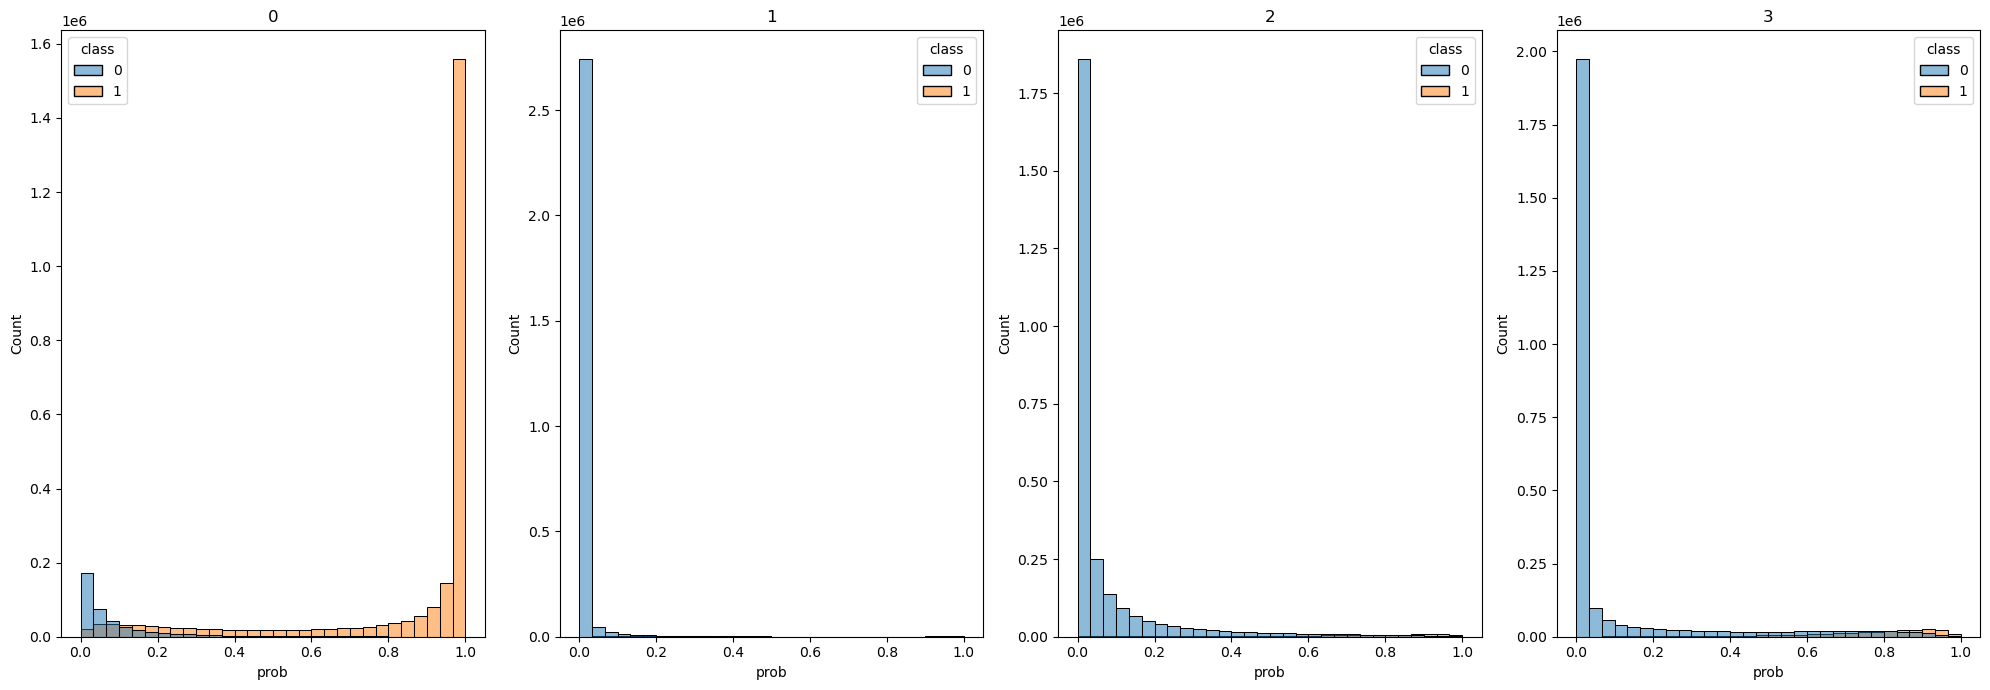

0 vs 1 ROC AUC OVO: 0.9944
0 vs 2 ROC AUC OVO: 0.9558
0 vs 3 ROC AUC OVO: 0.9722
1 vs 2 ROC AUC OVO: 0.9881
1 vs 3 ROC AUC OVO: 0.9427
2 vs 3 ROC AUC OVO: 0.9285
Average ROC AUC OVO: 0.9636


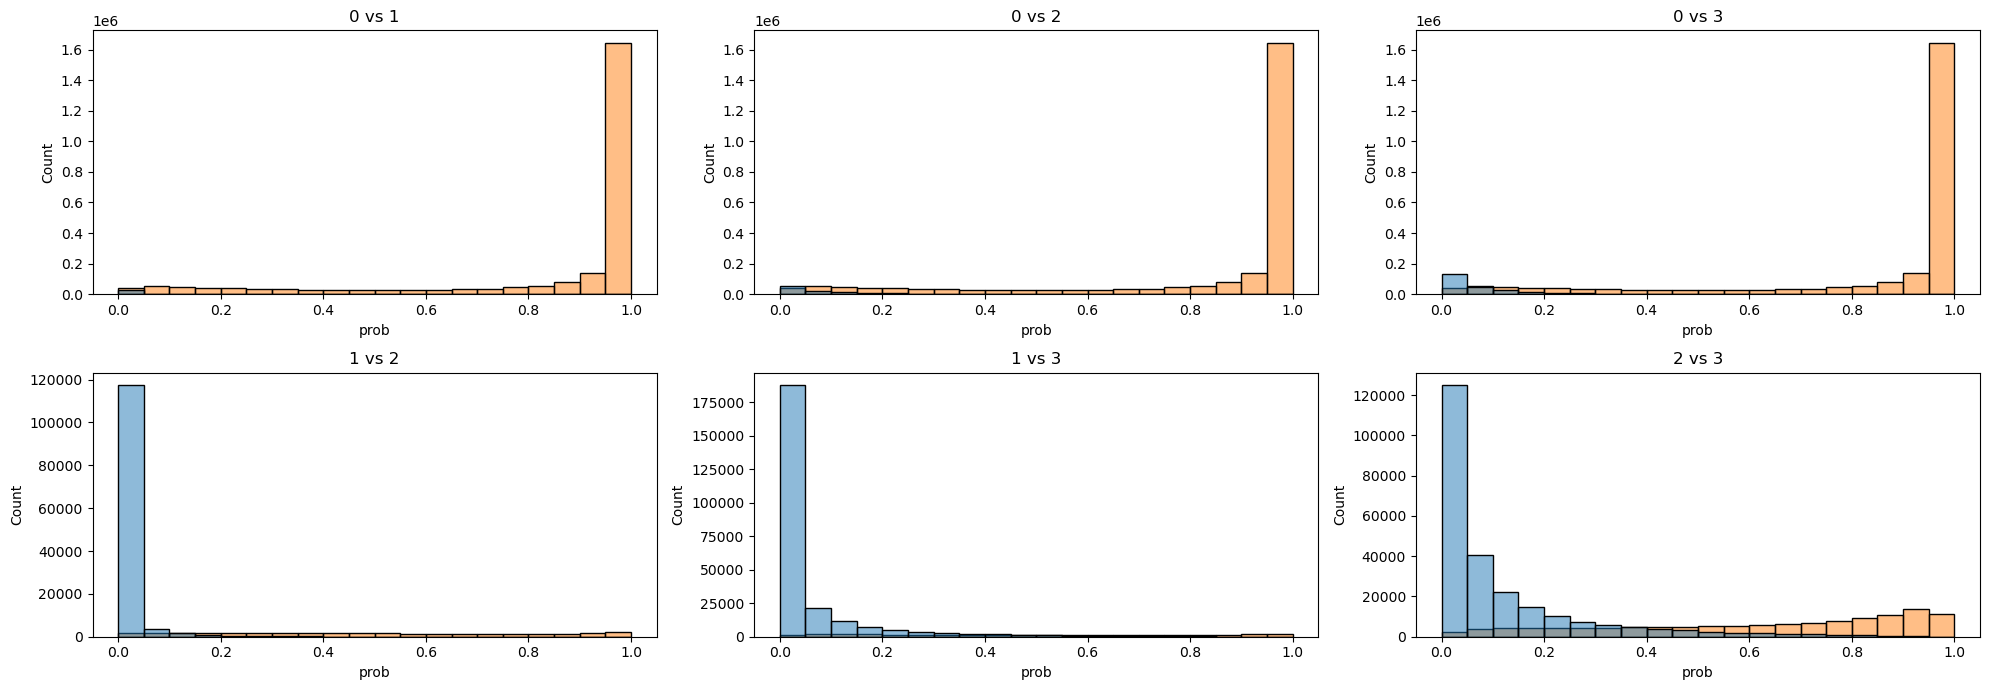

 50%|█████     | 4/8 [12:40<13:11, 197.87s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 0it [00:00, ?it/s]

mlp results:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90   2493115
           1       0.39      0.53      0.45     31174
           2       0.26      0.76      0.39    124554
           3       0.42      0.73      0.53    249306

    accuracy                           0.81   2898149
   macro avg       0.52      0.71      0.57   2898149
weighted avg       0.91      0.81      0.84   2898149



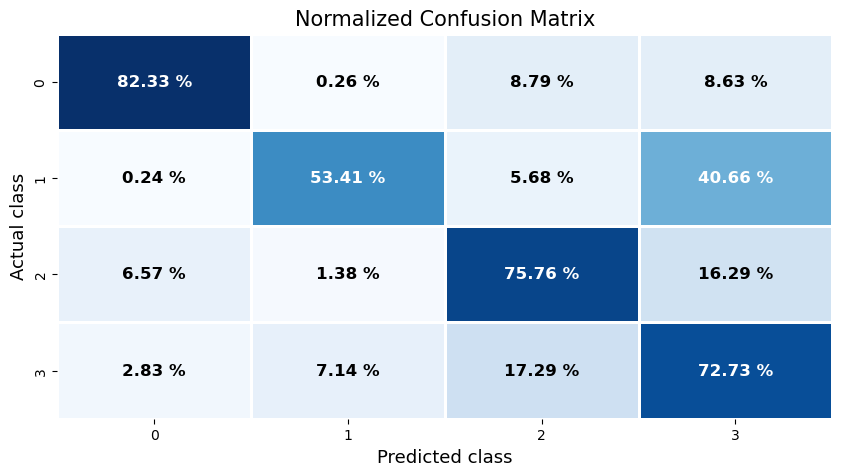

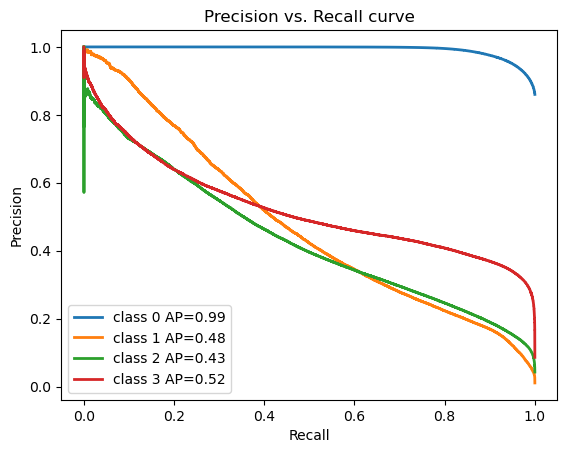

Average AP over all classes: 0.6071


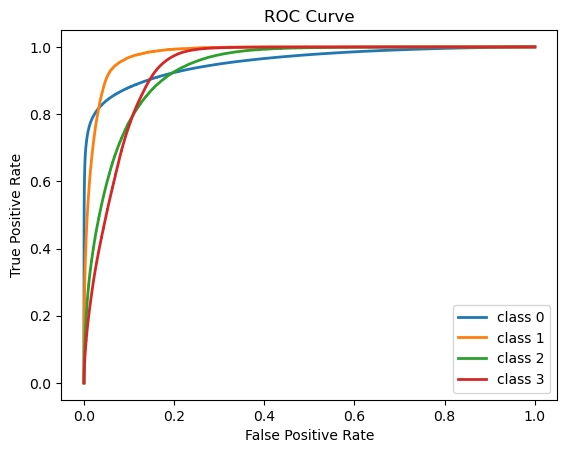

0 ROC AUC OVR: 0.9553
1 ROC AUC OVR: 0.9805
2 ROC AUC OVR: 0.9350
3 ROC AUC OVR: 0.9365
Average ROC AUC OVR: 0.9519


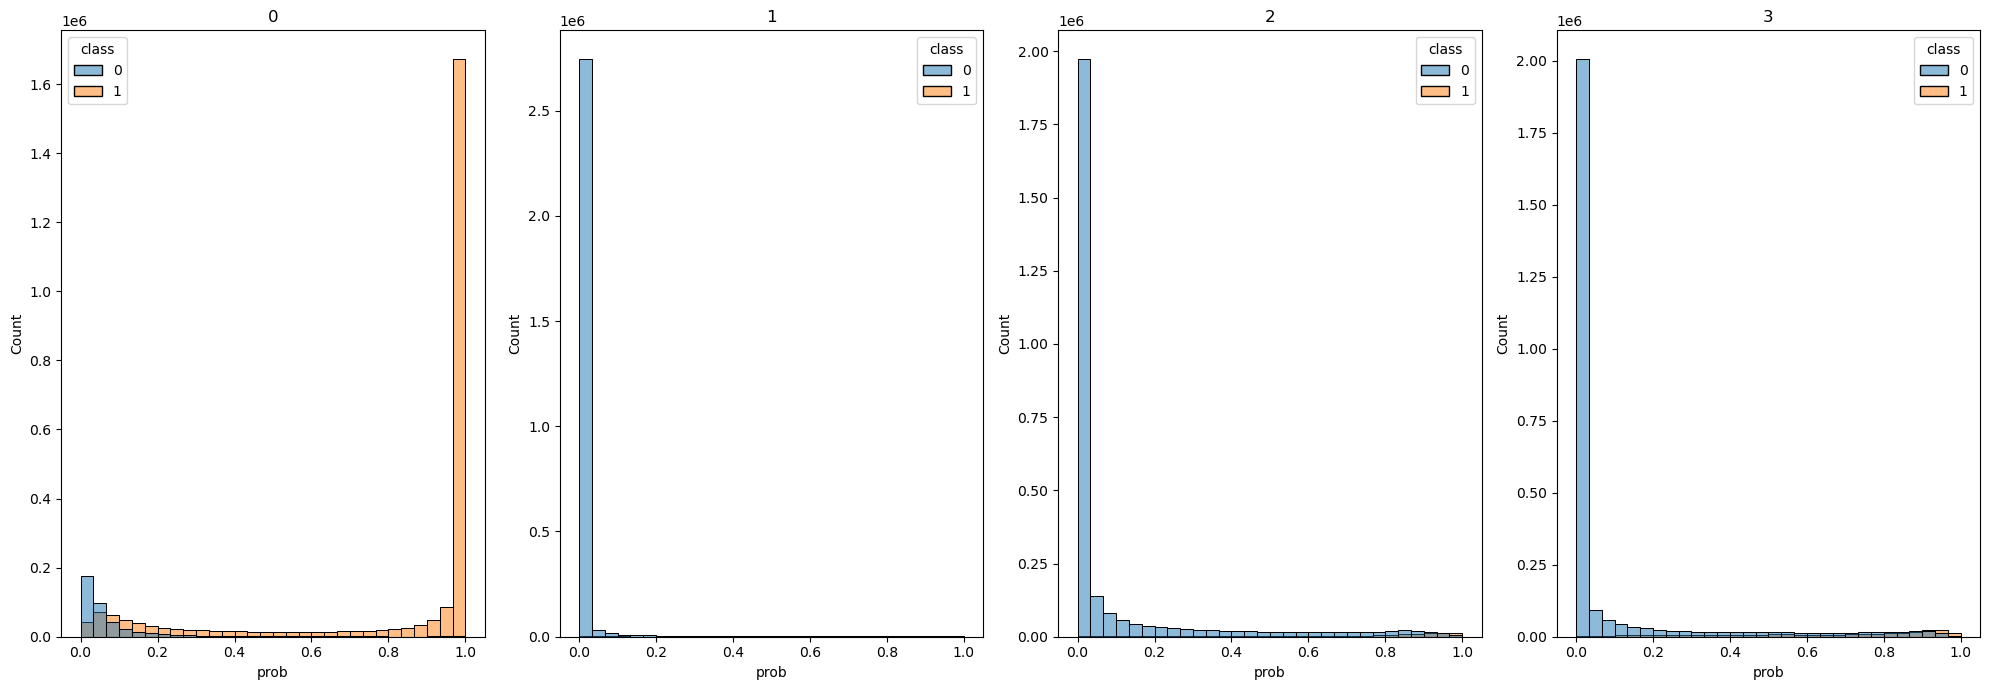

0 vs 1 ROC AUC OVO: 0.9865
0 vs 2 ROC AUC OVO: 0.9449
0 vs 3 ROC AUC OVO: 0.9567
1 vs 2 ROC AUC OVO: 0.9638
1 vs 3 ROC AUC OVO: 0.8836
2 vs 3 ROC AUC OVO: 0.8803
Average ROC AUC OVO: 0.9360


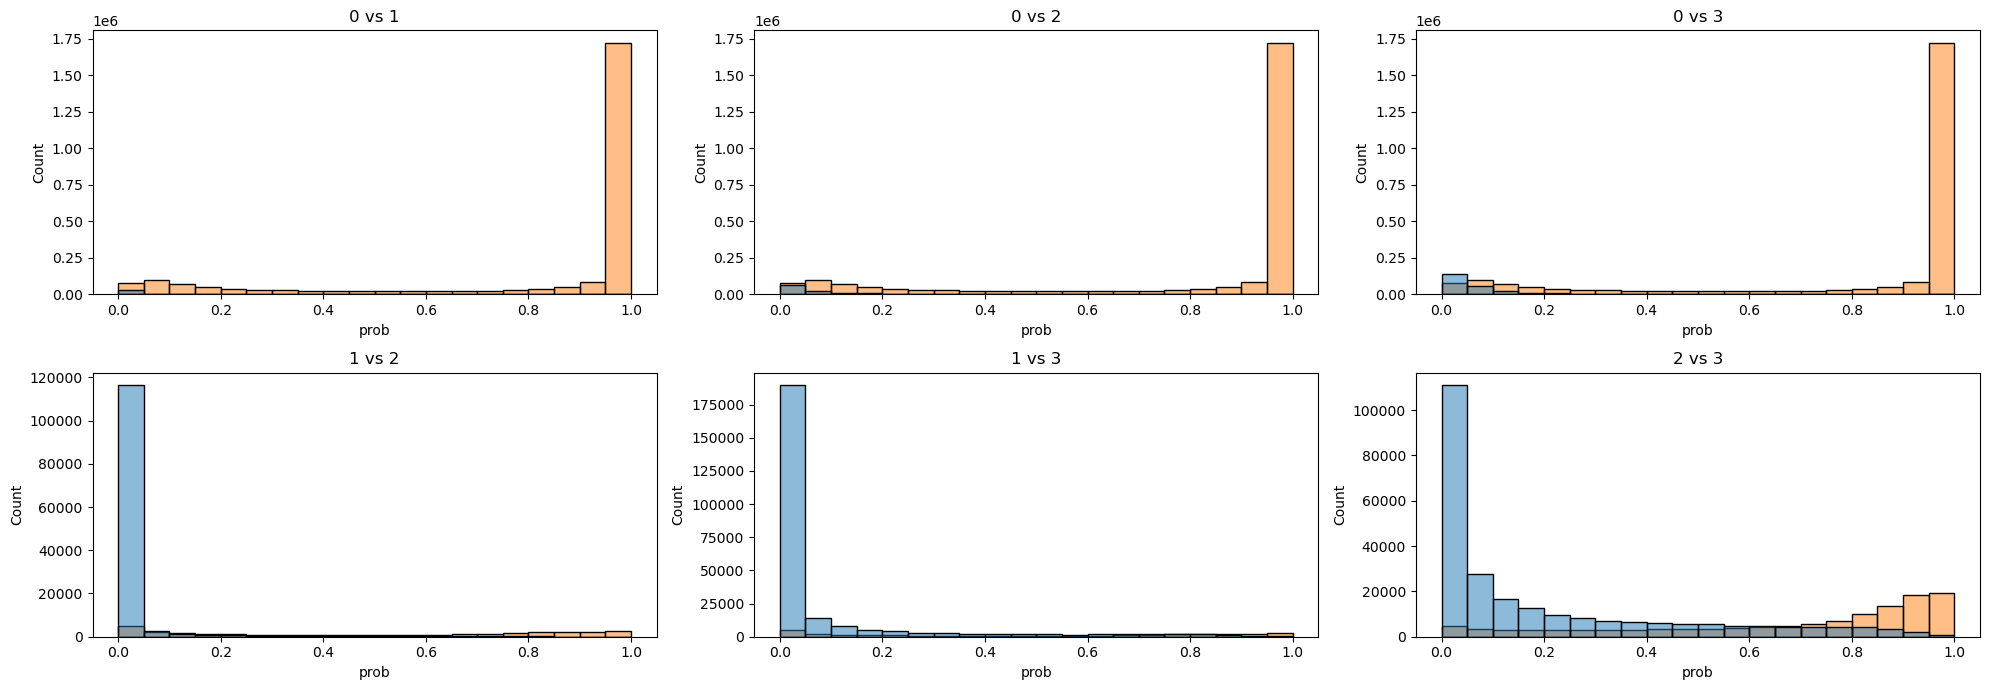

 62%|██████▎   | 5/8 [13:49<07:33, 151.22s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 0it [00:00, ?it/s]

lstm results:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92   2493115
           1       0.69      0.41      0.51     31174
           2       0.39      0.65      0.49    124554
           3       0.44      0.88      0.59    249306

    accuracy                           0.85   2898149
   macro avg       0.63      0.70      0.63   2898149
weighted avg       0.91      0.85      0.87   2898149



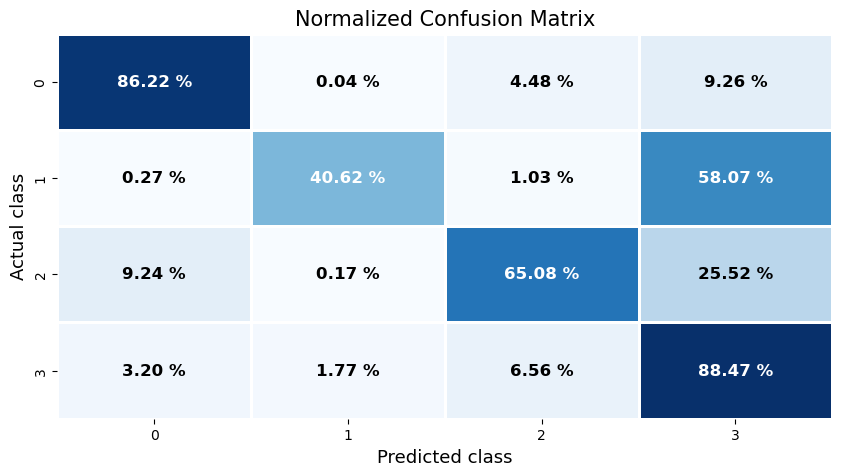

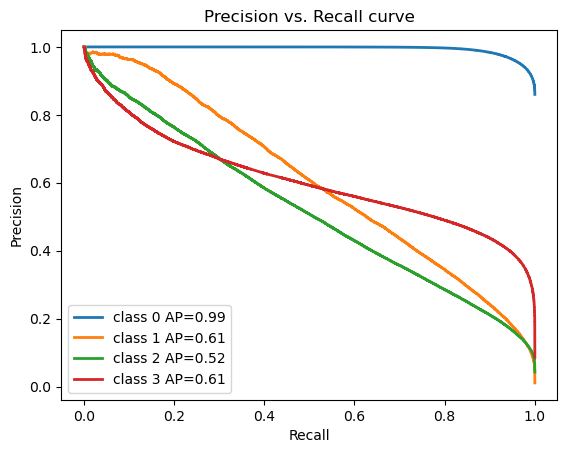

Average AP over all classes: 0.6820


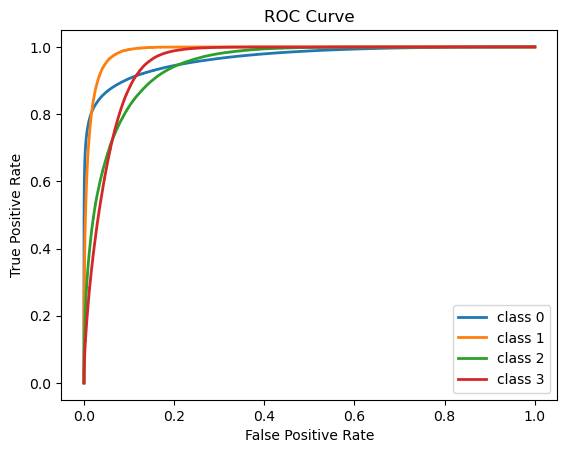

0 ROC AUC OVR: 0.9672
1 ROC AUC OVR: 0.9891
2 ROC AUC OVR: 0.9463
3 ROC AUC OVR: 0.9537
Average ROC AUC OVR: 0.9641


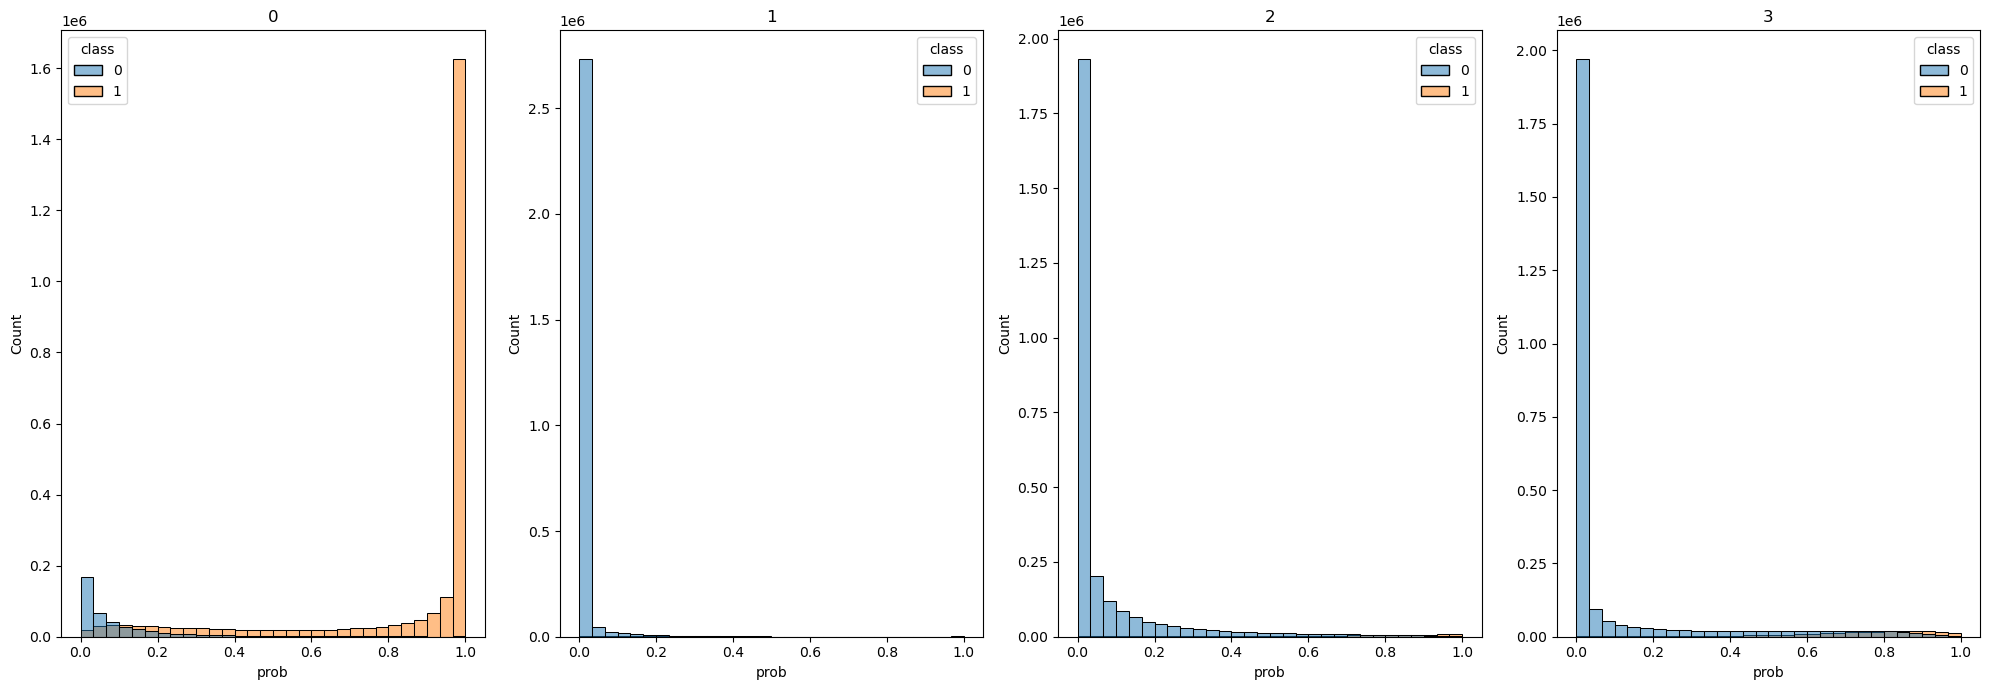

0 vs 1 ROC AUC OVO: 0.9933
0 vs 2 ROC AUC OVO: 0.9538
0 vs 3 ROC AUC OVO: 0.9706
1 vs 2 ROC AUC OVO: 0.9817
1 vs 3 ROC AUC OVO: 0.9186
2 vs 3 ROC AUC OVO: 0.9059
Average ROC AUC OVO: 0.9540


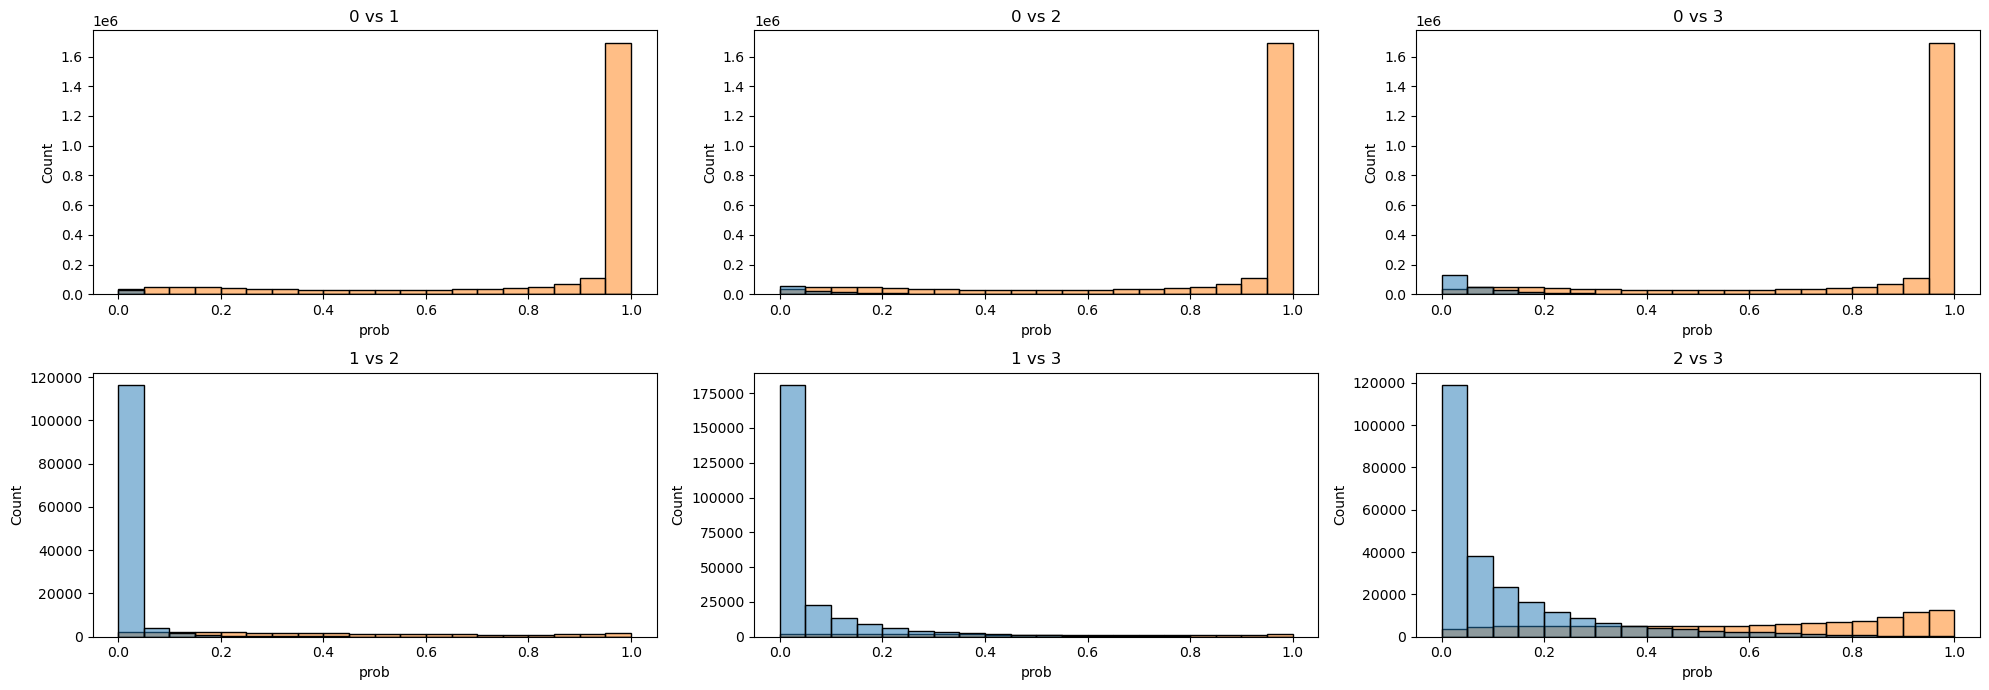

 75%|███████▌  | 6/8 [15:09<04:13, 126.99s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 0it [00:00, ?it/s]

transformer results:
              precision    recall  f1-score   support

           0       0.99      0.80      0.88   2493115
           1       0.38      0.56      0.45     31174
           2       0.23      0.60      0.34    124554
           3       0.37      0.77      0.50    249306

    accuracy                           0.78   2898149
   macro avg       0.49      0.68      0.54   2898149
weighted avg       0.90      0.78      0.82   2898149



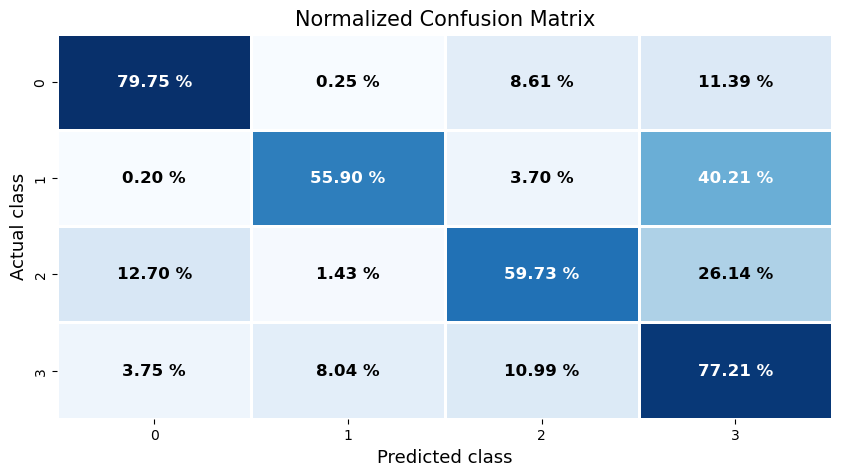

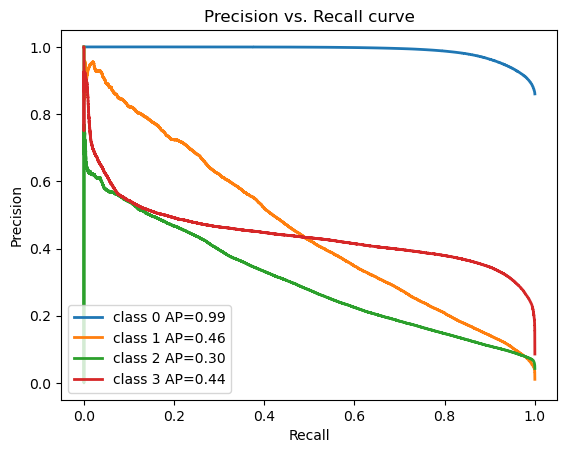

Average AP over all classes: 0.5484


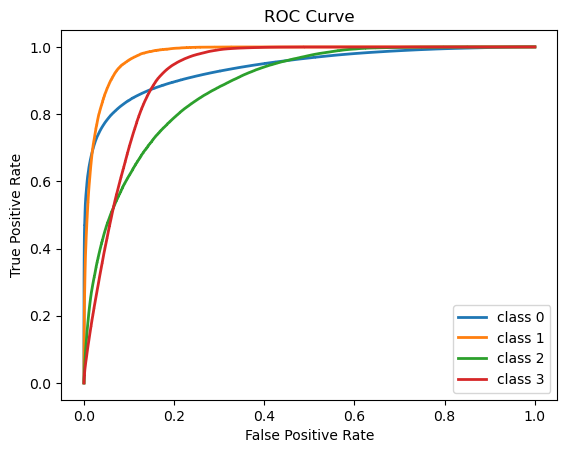

0 ROC AUC OVR: 0.9383
1 ROC AUC OVR: 0.9791
2 ROC AUC OVR: 0.8834
3 ROC AUC OVR: 0.9233
Average ROC AUC OVR: 0.9310


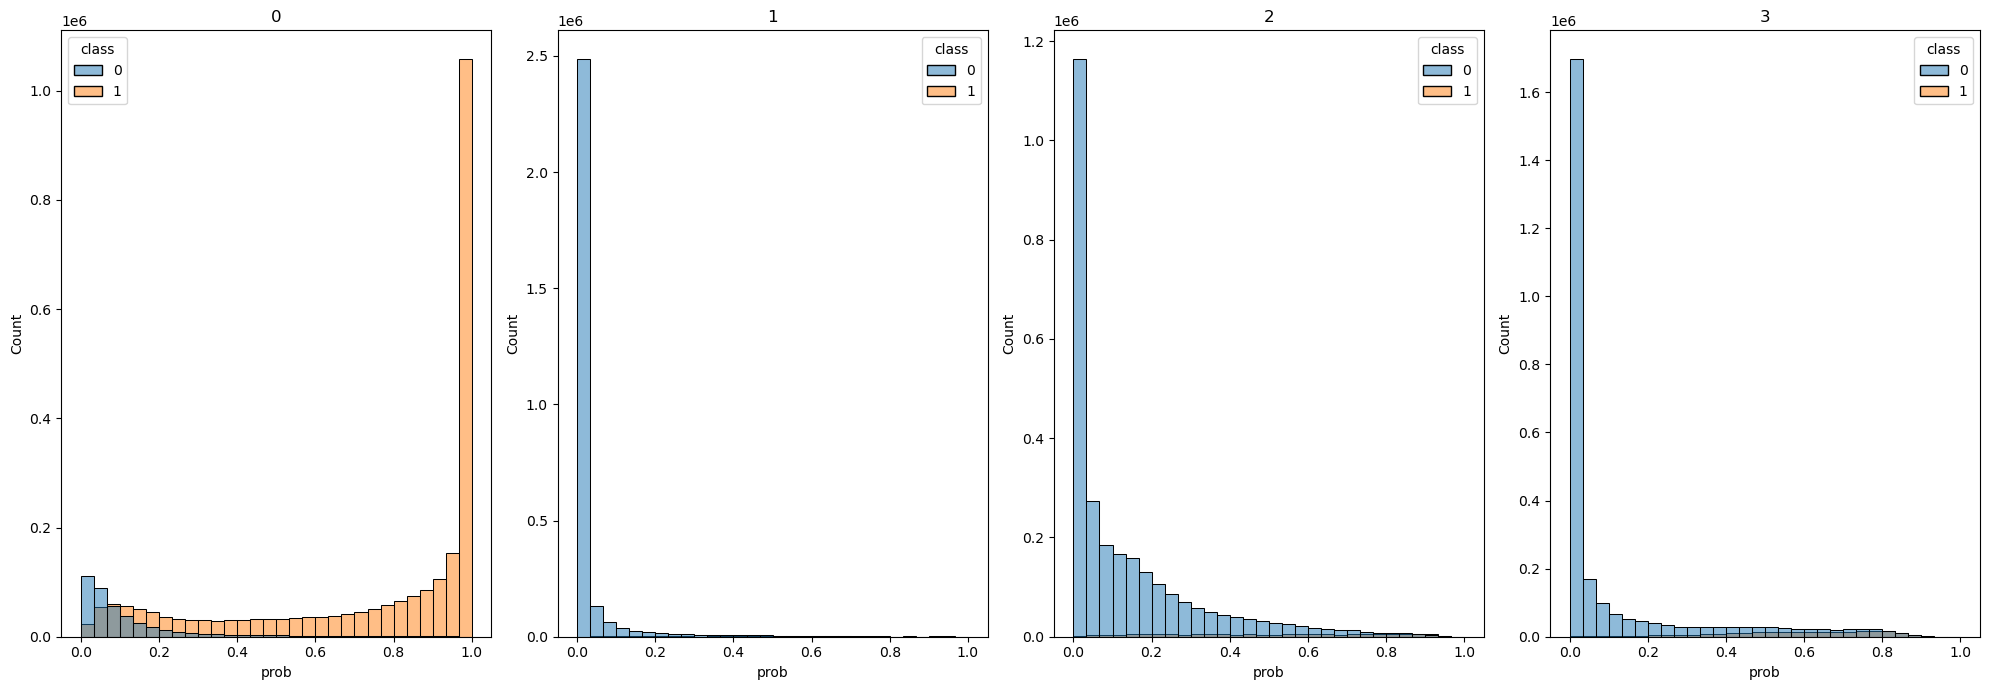

0 vs 1 ROC AUC OVO: 0.9887
0 vs 2 ROC AUC OVO: 0.9065
0 vs 3 ROC AUC OVO: 0.9479
1 vs 2 ROC AUC OVO: 0.9596
1 vs 3 ROC AUC OVO: 0.8690
2 vs 3 ROC AUC OVO: 0.8529
Average ROC AUC OVO: 0.9208


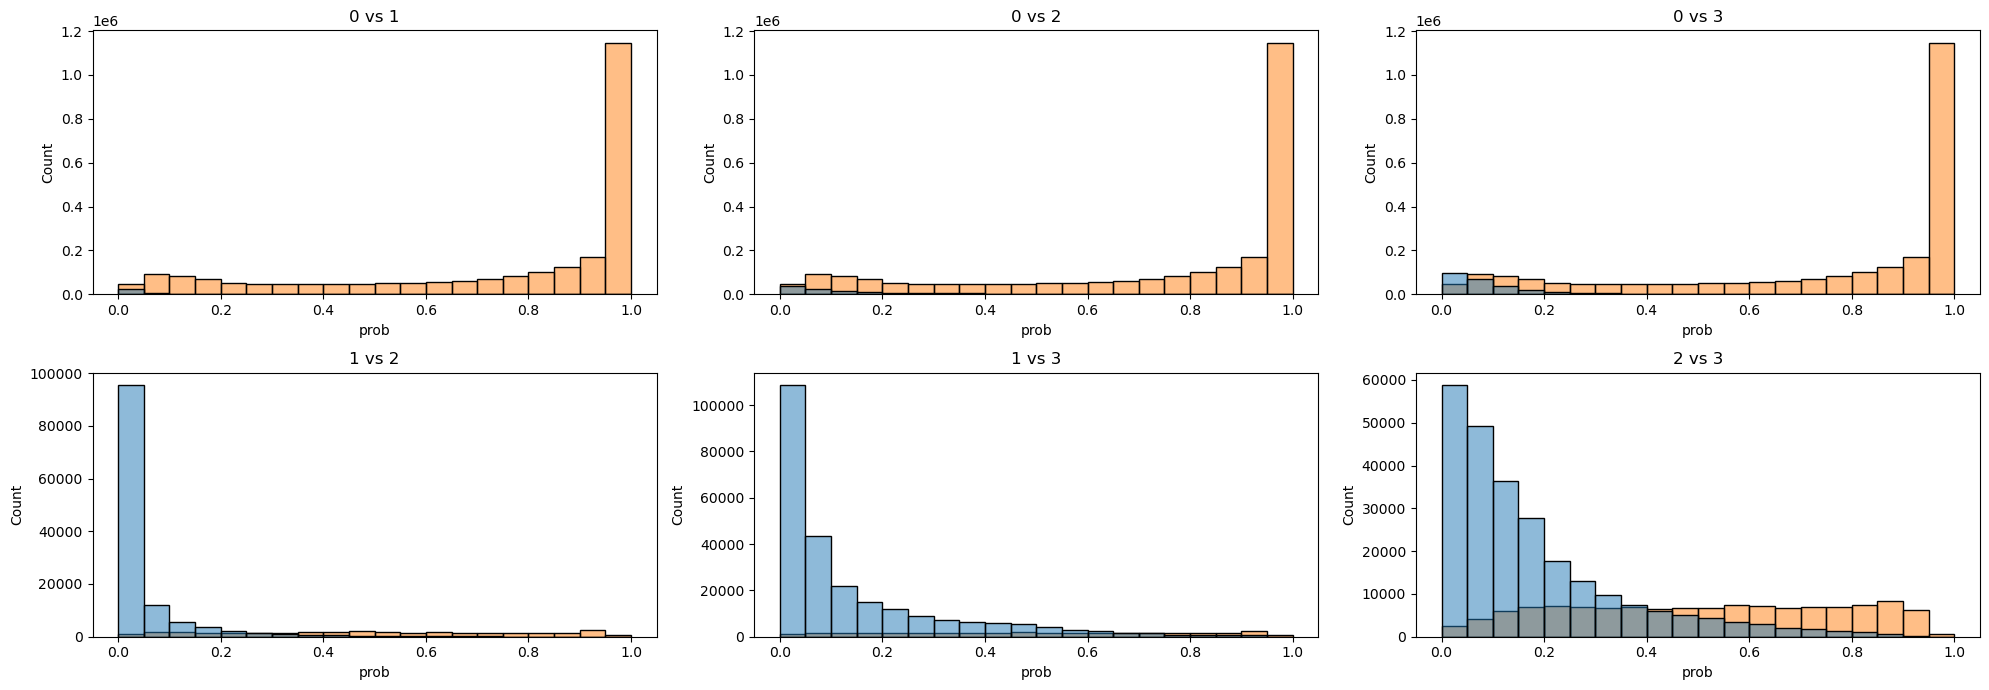

 88%|████████▊ | 7/8 [16:46<01:57, 117.44s/it]LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 0it [00:00, ?it/s]

conv_lstm results:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90   2493115
           1       0.45      0.52      0.49     31174
           2       0.28      0.64      0.39    124554
           3       0.39      0.81      0.53    249306

    accuracy                           0.81   2898149
   macro avg       0.53      0.70      0.57   2898149
weighted avg       0.90      0.81      0.84   2898149



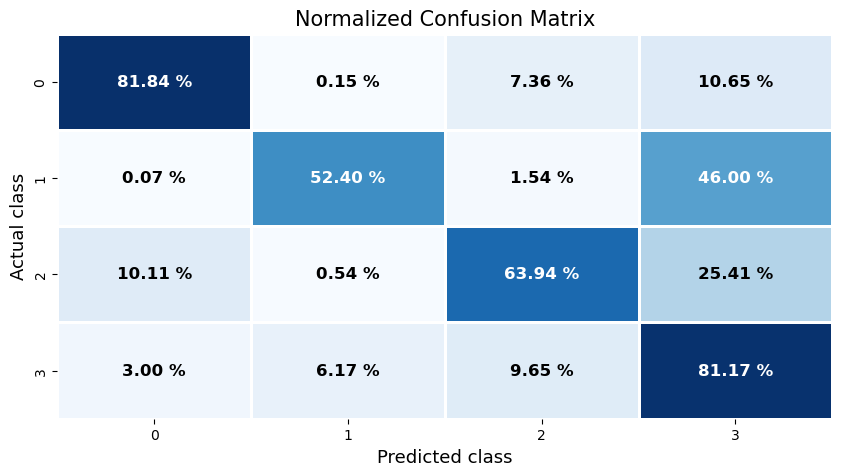

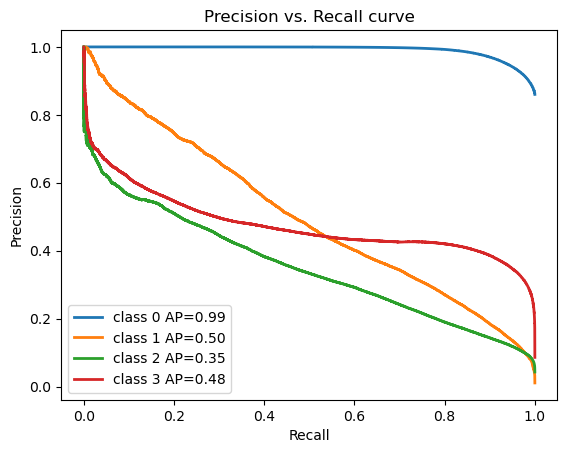

Average AP over all classes: 0.5792


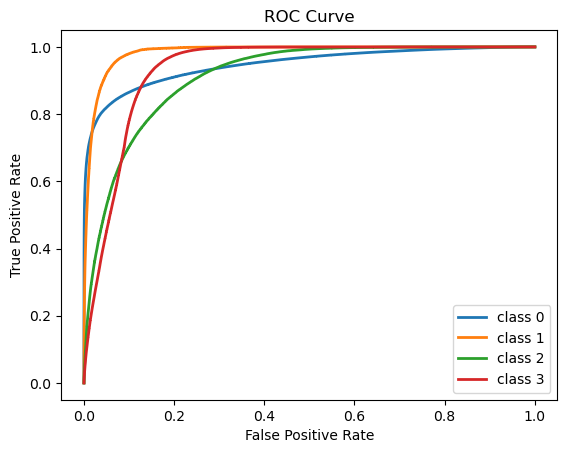

0 ROC AUC OVR: 0.9468
1 ROC AUC OVR: 0.9842
2 ROC AUC OVR: 0.9126
3 ROC AUC OVR: 0.9337
Average ROC AUC OVR: 0.9443


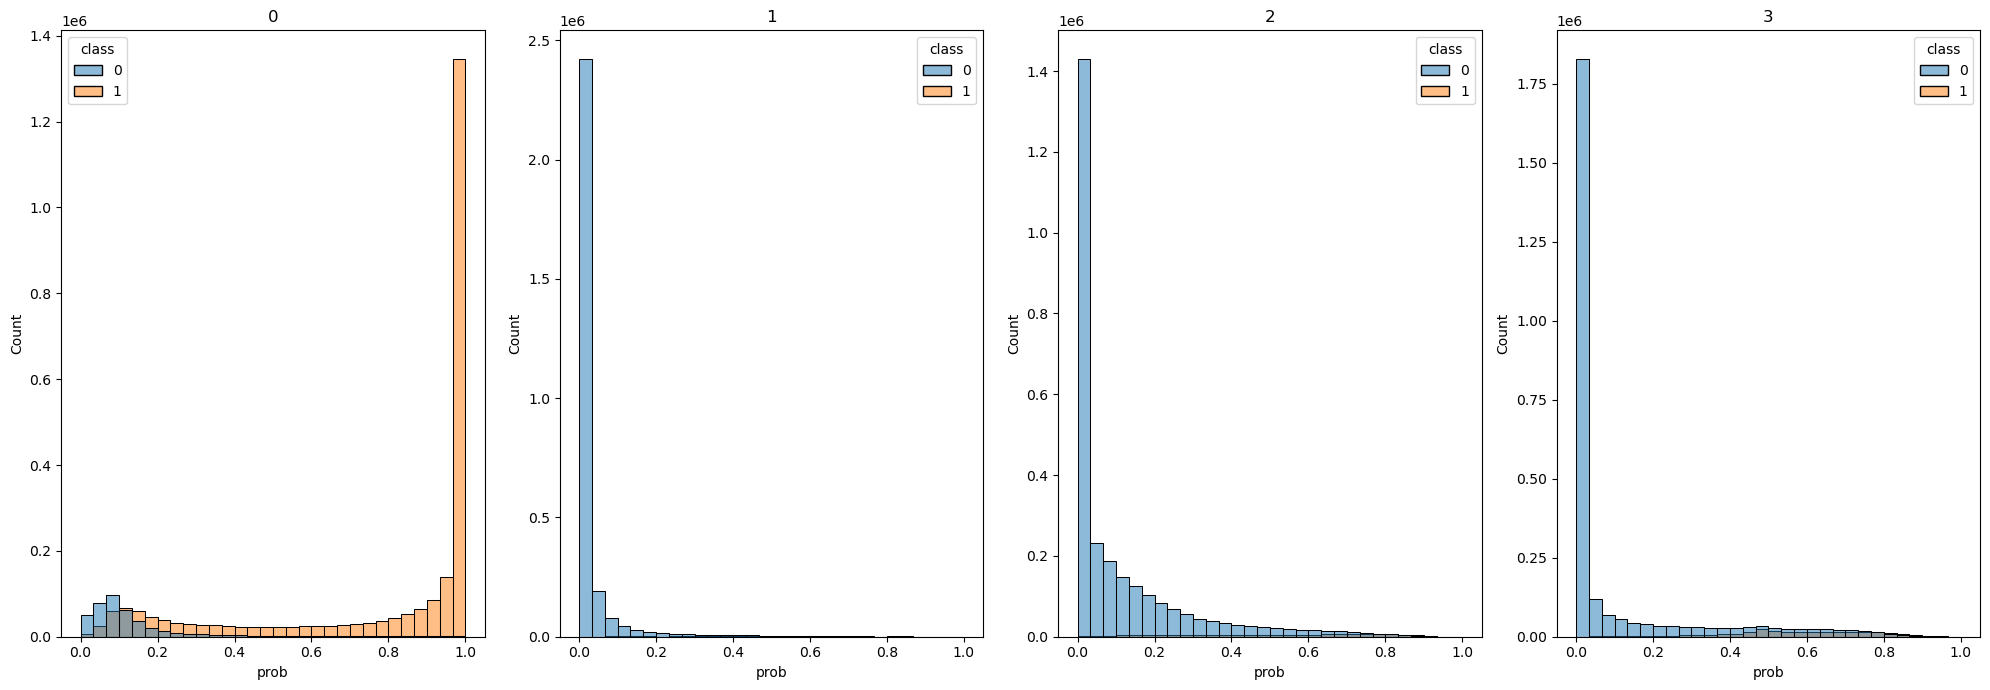

0 vs 1 ROC AUC OVO: 0.9926
0 vs 2 ROC AUC OVO: 0.9153
0 vs 3 ROC AUC OVO: 0.9569
1 vs 2 ROC AUC OVO: 0.9746
1 vs 3 ROC AUC OVO: 0.8912
2 vs 3 ROC AUC OVO: 0.8736
Average ROC AUC OVO: 0.9340


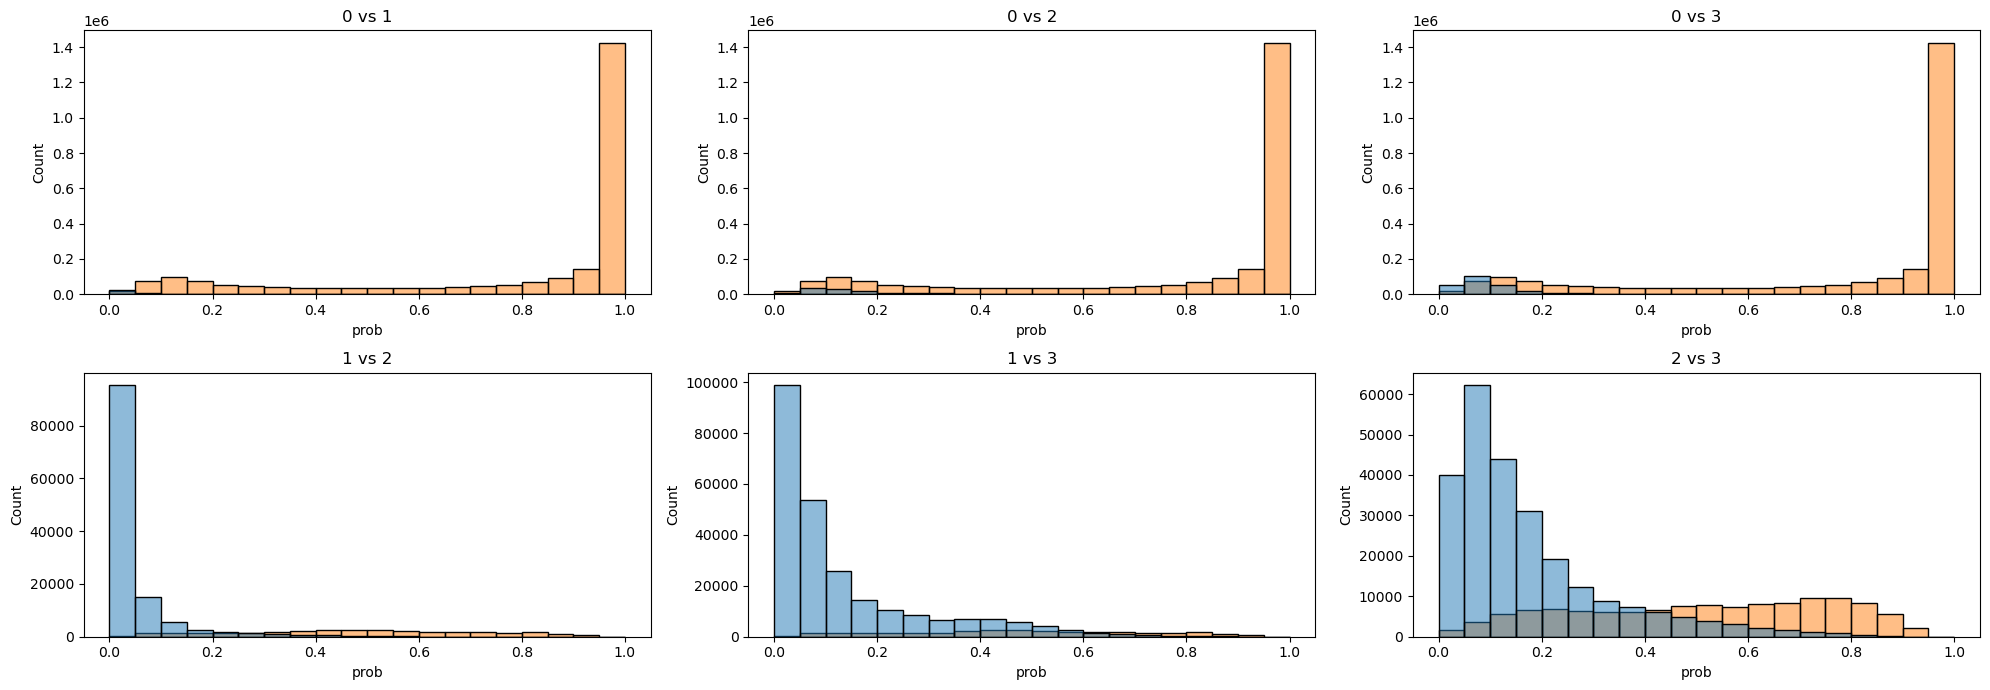

100%|██████████| 8/8 [18:03<00:00, 135.46s/it]


In [4]:
joint_dict = {**clf_dict, **clf_nn_dict}
y_probs = evaluate_models_on_test_data(joint_dict, X_test, X_test_t, X_lstm, y_test)

Mean models results:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91   2493115
           1       0.70      0.43      0.53     31174
           2       0.37      0.67      0.48    124554
           3       0.42      0.89      0.57    249306

    accuracy                           0.84   2898149
   macro avg       0.62      0.71      0.62   2898149
weighted avg       0.91      0.84      0.86   2898149



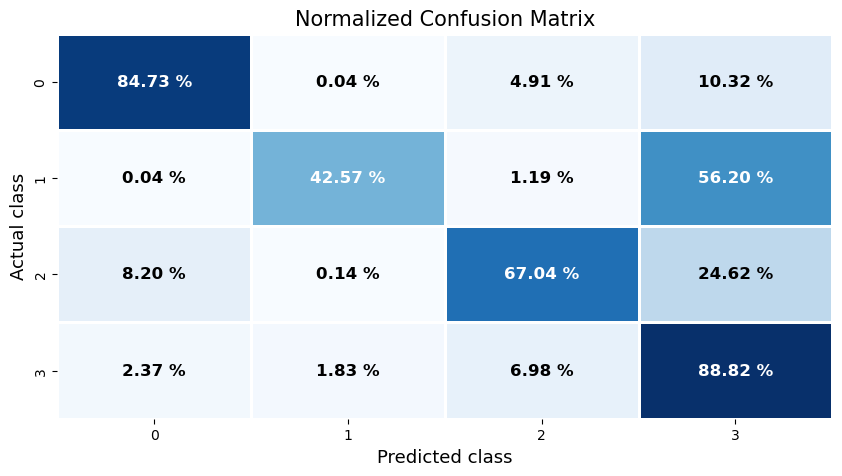

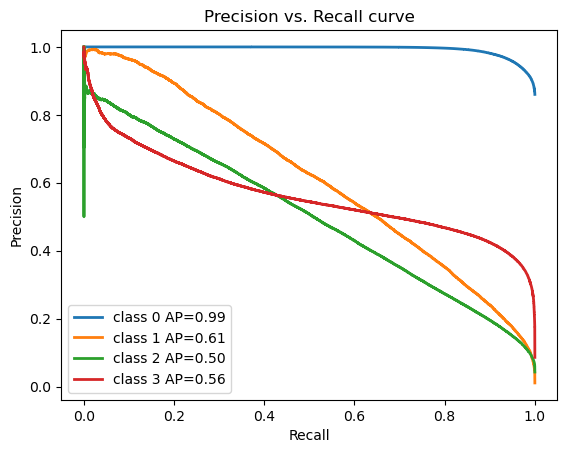

Average AP over all classes: 0.6677


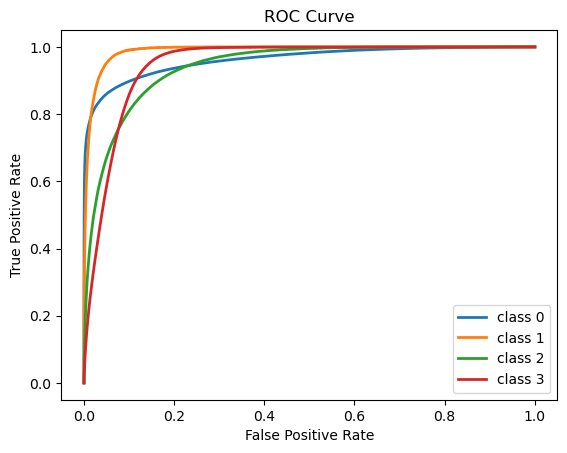

0 ROC AUC OVR: 0.9623
1 ROC AUC OVR: 0.9890
2 ROC AUC OVR: 0.9416
3 ROC AUC OVR: 0.9485
Average ROC AUC OVR: 0.9603


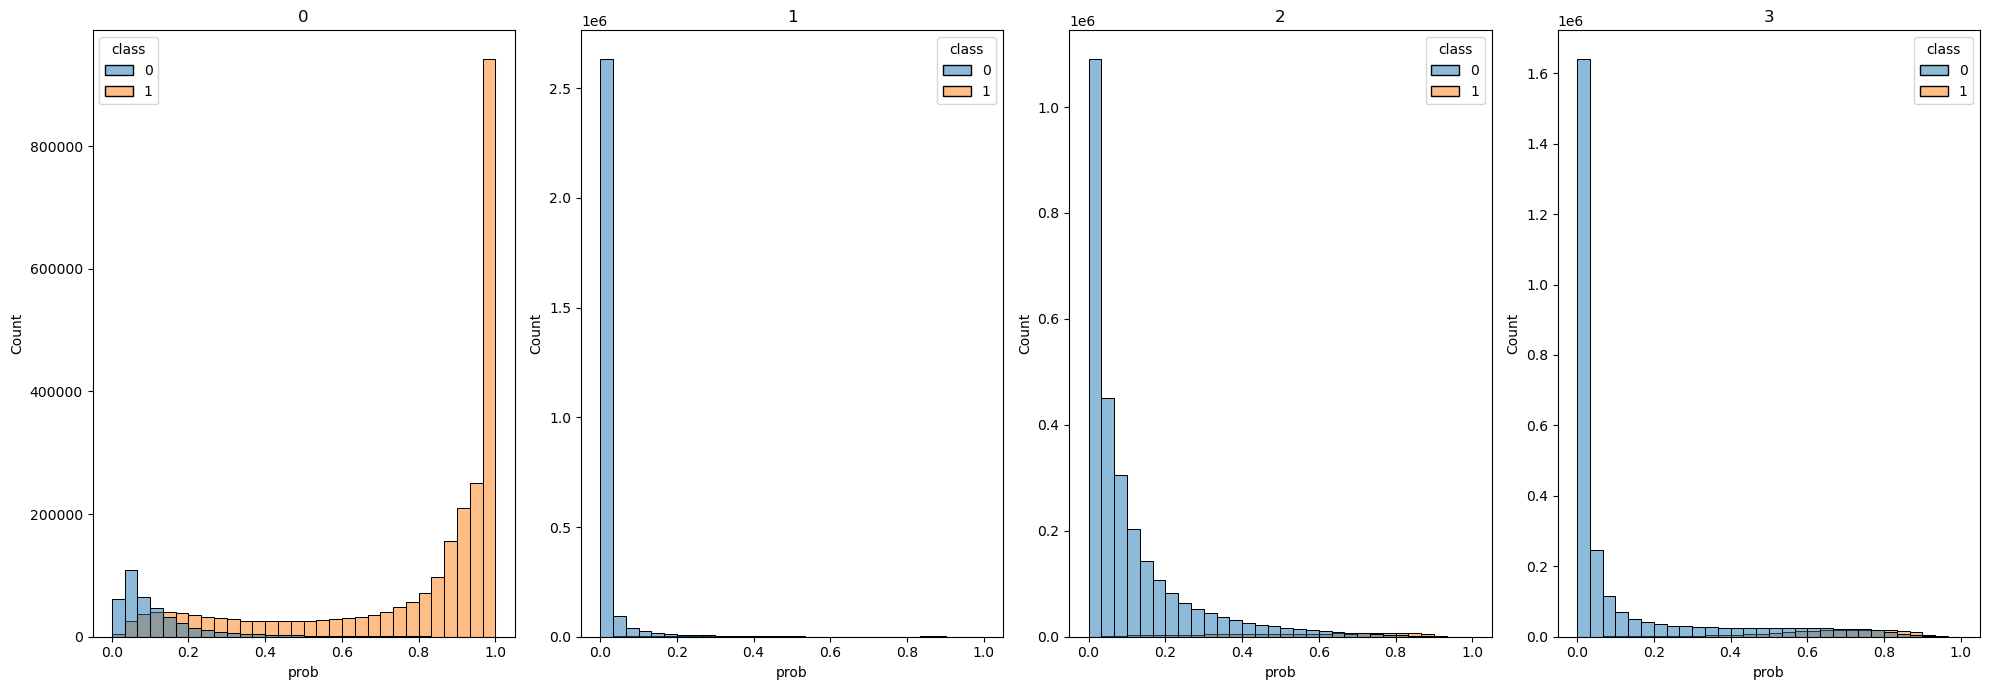

0 vs 1 ROC AUC OVO: 0.9940
0 vs 2 ROC AUC OVO: 0.9401
0 vs 3 ROC AUC OVO: 0.9694
1 vs 2 ROC AUC OVO: 0.9821
1 vs 3 ROC AUC OVO: 0.9204
2 vs 3 ROC AUC OVO: 0.9108
Average ROC AUC OVO: 0.9528


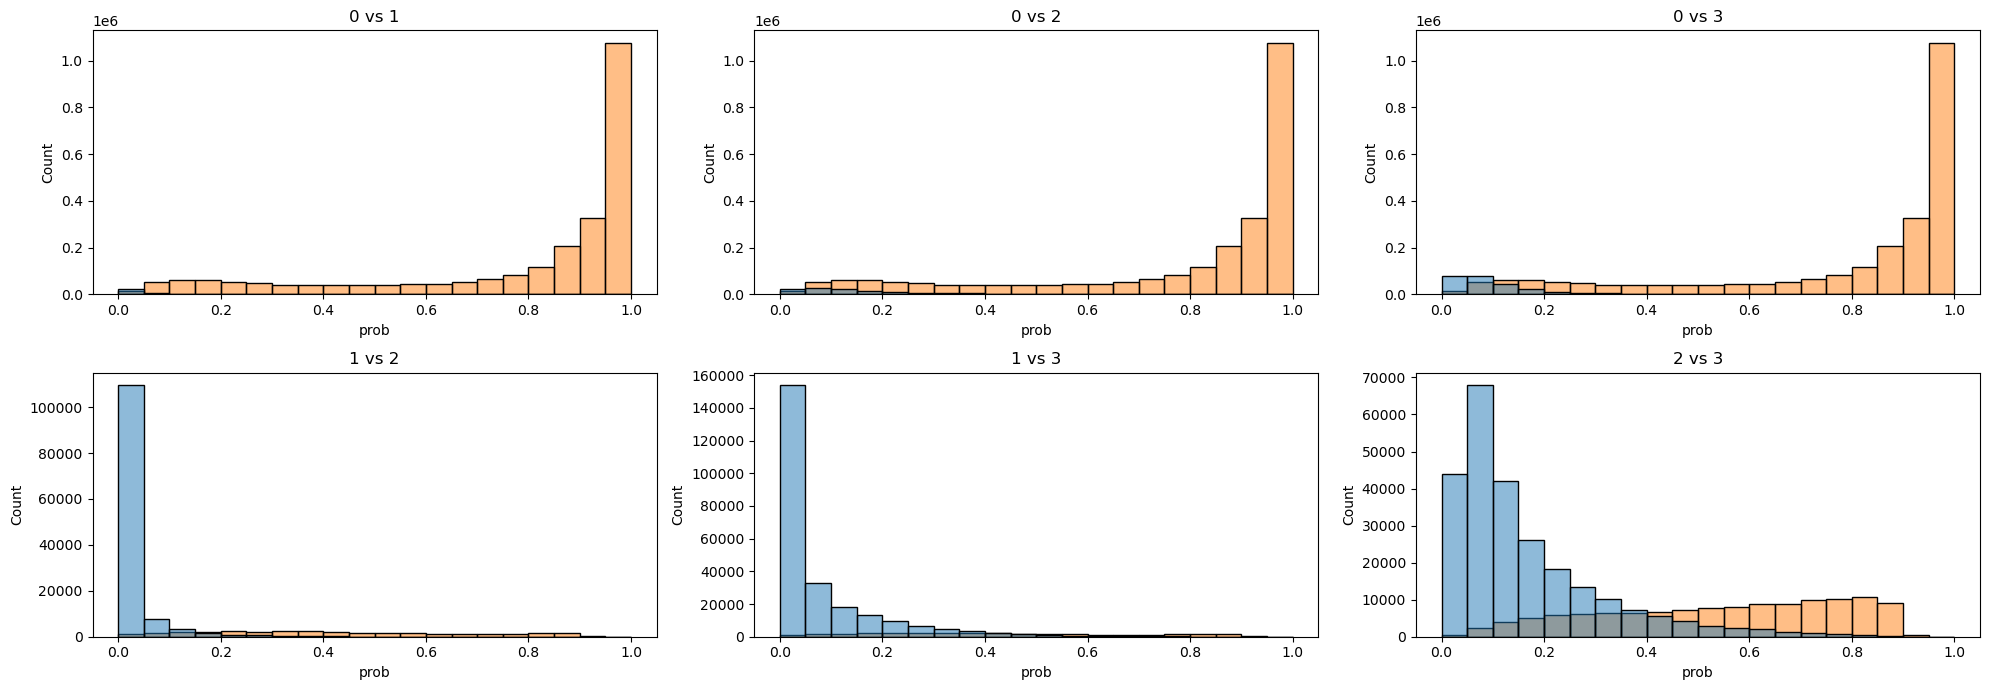

In [5]:
# Mean probabilities

mean_y_prob = np.divide(sum(y_probs.values()), len(y_probs.keys()))
mean_y_pred = [np.argmax(i) for i in mean_y_prob]


print("Mean models results:")
custom_multiclass_report(y_test, mean_y_pred, mean_y_prob)

Mean models results:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91   2493115
           1       0.57      0.50      0.53     31174
           2       0.34      0.70      0.46    124554
           3       0.42      0.85      0.56    249306

    accuracy                           0.83   2898149
   macro avg       0.58      0.72      0.62   2898149
weighted avg       0.91      0.83      0.86   2898149



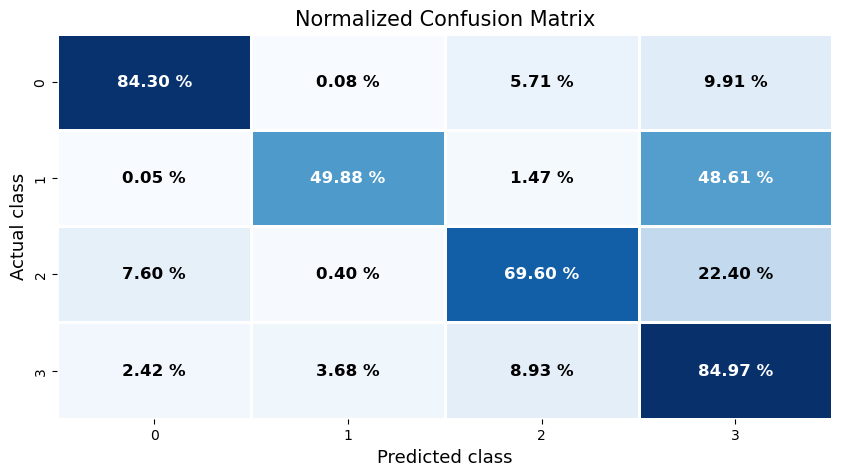

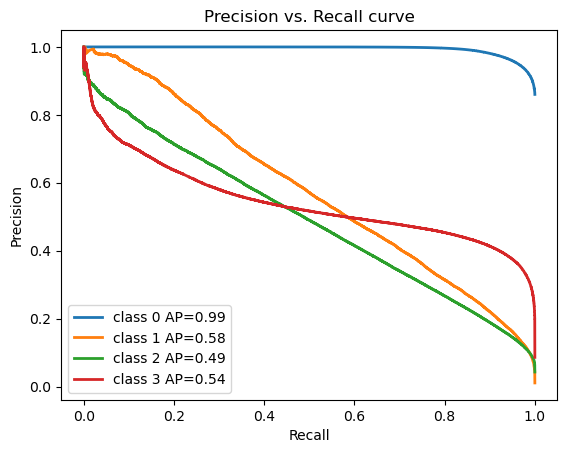

Average AP over all classes: 0.6510


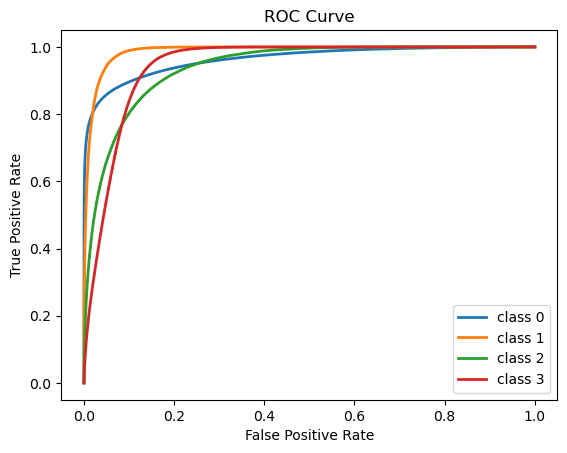

0 ROC AUC OVR: 0.9633
1 ROC AUC OVR: 0.9876
2 ROC AUC OVR: 0.9396
3 ROC AUC OVR: 0.9450
Average ROC AUC OVR: 0.9589


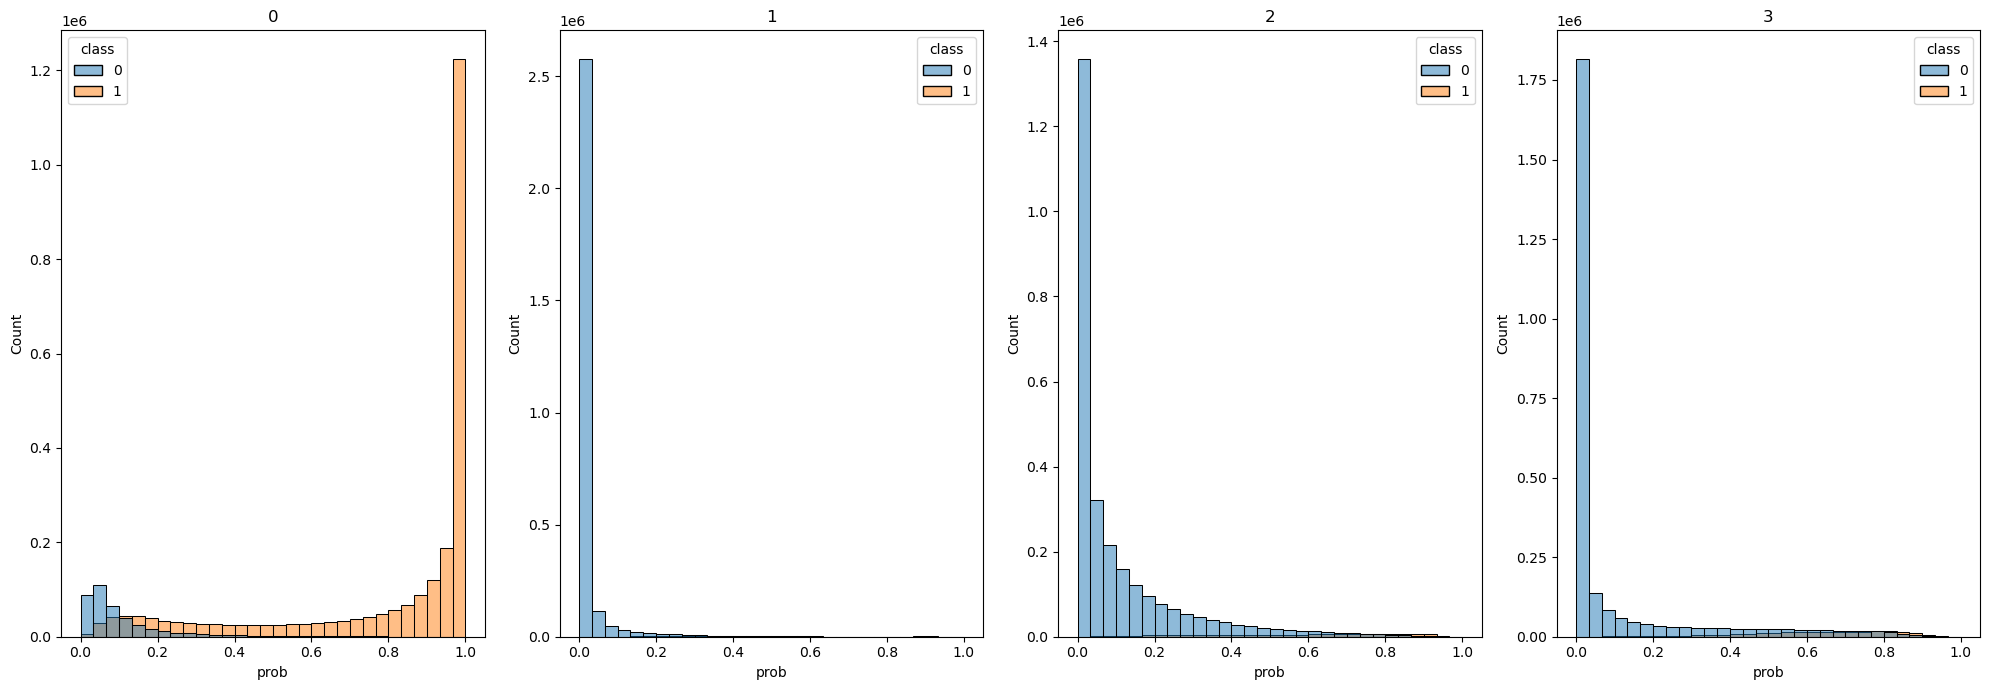

0 vs 1 ROC AUC OVO: 0.9952
0 vs 2 ROC AUC OVO: 0.9433
0 vs 3 ROC AUC OVO: 0.9693
1 vs 2 ROC AUC OVO: 0.9799
1 vs 3 ROC AUC OVO: 0.9104
2 vs 3 ROC AUC OVO: 0.9050
Average ROC AUC OVO: 0.9505


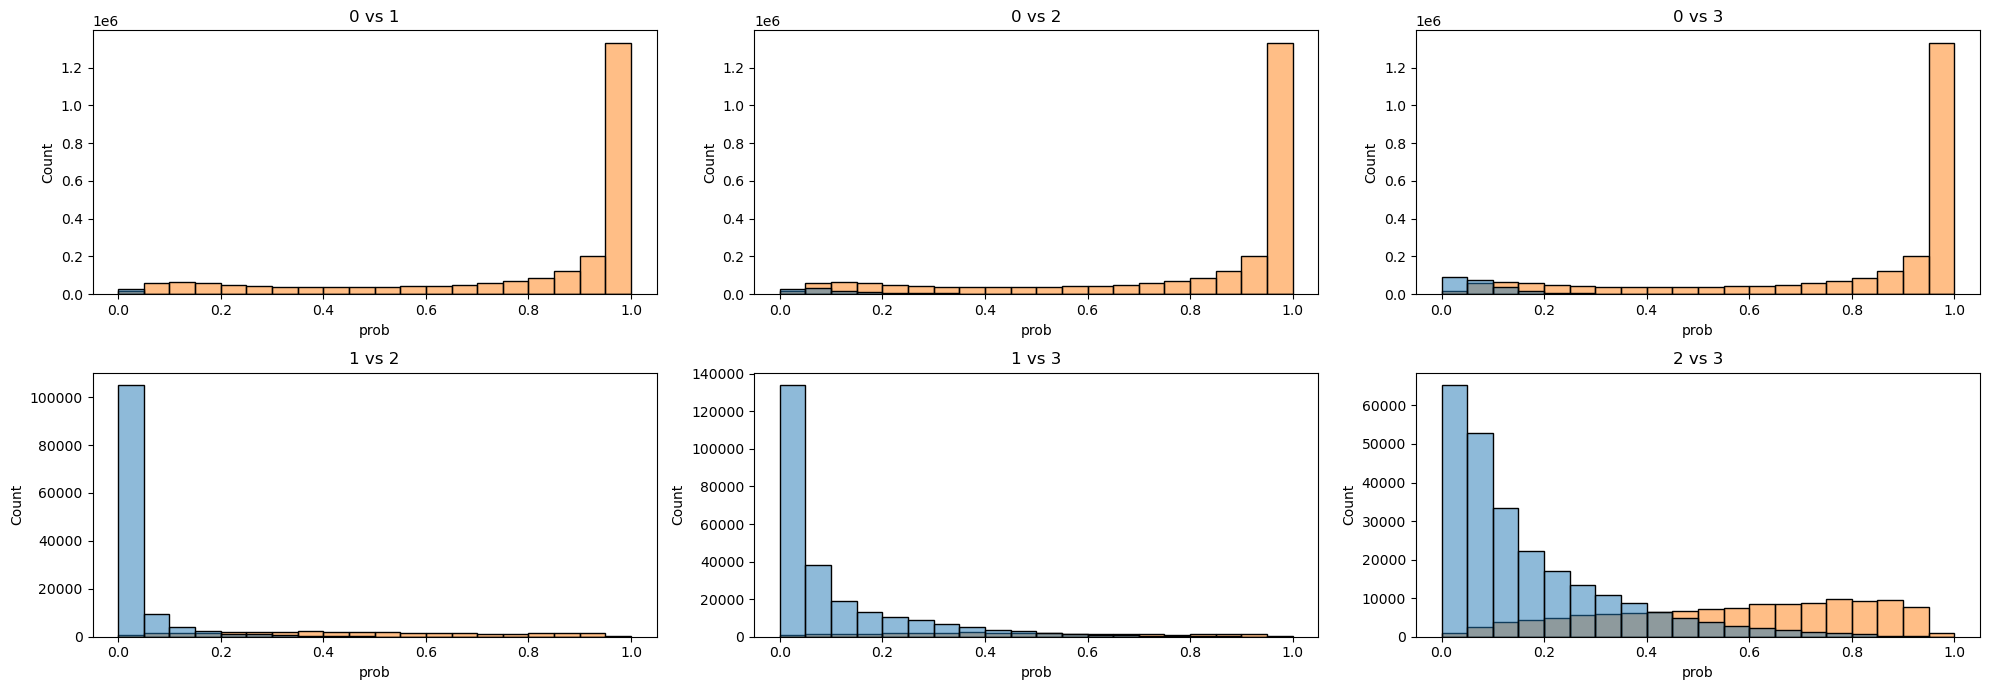

In [6]:
# Mean probabilities for nn

y_probs_nn = {key: y_probs[key] for key in y_probs.keys() if key in ['mlp', 'lstm', 'transformer', 'conv_lstm']}

mean_nn_y_prob = np.divide(sum(y_probs_nn.values()), len(y_probs_nn.keys()))
mean_nn_y_pred = [np.argmax(i) for i in mean_nn_y_prob]


print("Mean models results:")
custom_multiclass_report(y_test, mean_nn_y_pred, mean_nn_y_prob)

              precision    recall  f1-score   support

           0       0.99      0.85      0.92   2493115
           1       0.56      0.51      0.54     31174
           2       0.36      0.70      0.48    124554
           3       0.43      0.84      0.57    249306

    accuracy                           0.84   2898149
   macro avg       0.59      0.73      0.63   2898149
weighted avg       0.91      0.84      0.86   2898149



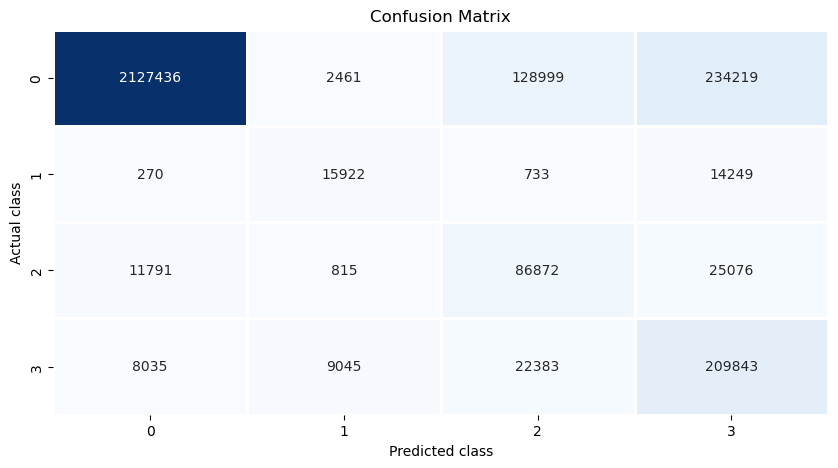

In [7]:
# Max prob predictions

# Predict on test set
y_prob_joint = np.concatenate([y_probs[x] for x in y_probs], 1)
y_pred_maxprob = [np.argmax(values) % 4 for values in y_prob_joint]
# -----------------------------------------------------
# Printing metrics
print(classification_report(y_test, y_pred_maxprob))
# -----------------------------------------------------
#  # Plot confusion matrix
plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred_maxprob)
sns.heatmap(
    cm,
    annot=True,
    xticklabels=[0, 1, 2, 3],
    yticklabels=[0, 1, 2, 3],
    cbar=False,
    fmt="d",
    linewidths=1,
    cmap="Blues",
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.show()
# -----------------------------------------------------